<h1><font color="#007090">Project Overview </h1>

The goal of this project is to analyze the last marketing campaign conducted by the bank and extract valuable insights that will guide the development of future marketing strategies. By examining patterns and trends from the previous campaign, we aim to identify successful approaches and areas for improvement, ultimately optimizing future marketing efforts.

<h1><font color="#007090">Import packages</h1>

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib as mpl


<h1><font color="#007090">Loading raw dataset</h1>

In [2]:
#import dataset-Keira
df=pd.read_csv('/Users/kt1u1/Desktop/bank.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kt1u1/Desktop/bank.csv'

In [55]:
df.shape

(11162, 17)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


<h3><font color="#007090">Detailed data description of Credit Risk dataset</h3>





i. bank client data:
    
1. age: (numeric)
2. job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education: (categorical: primary, secondary, tertiary and unknown)
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. balance: Balance of the individual.
    
    

ii. Related with the last contact of the current campaign:
    
9.  contact: contact communication type (categorical: 'cellular','telephone')
10. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

iii. other attributes:
    
    
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

    
    
Output variable (desired target):
    
17. deposit - has the client subscribed a term deposit? (binary: 'yes','no')

In [57]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [58]:
#add missing value function
random.seed(0)
def add_missing(dataframe, column_name, num_missing):
    col_index=dataframe.columns.get_loc(column_name)
    random_index=random.sample(range(len(dataframe)),num_missing)
    dataframe.iloc[random_index,col_index]=np.nan

In [59]:
#replace 3 obs of variable 'previous' to missing
add_missing(df,'previous',3)
df_copy_M=df.copy()
df_copy=df.copy()
df['depositA'] = df['deposit'].copy()  # copy depsoit column

In [60]:
#validation for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     3
poutcome     0
deposit      0
depositA     0
dtype: int64

In [61]:
df.shape

(11162, 18)

In [62]:
df[df.isnull().any(axis=1)]

age          job  marital education default  balance housing loan  \
663    41   technician  married  tertiary      no      515      no   no   
6311   56      retired  married   primary      no      152     yes  yes   
6890   39  blue-collar  married   primary      no      186     yes   no   

       contact  day month  duration  campaign  pdays  previous poutcome  \
663   cellular    5   aug       837         2     -1       NaN  unknown   
6311  cellular   30   jul        65         7     -1       NaN  unknown   
6890   unknown   16   may       208         3     -1       NaN  unknown   

     deposit depositA  
663      yes      yes  
6311      no       no  
6890      no       no

In [63]:
#check duplicates
dupcheck=df[df.duplicated()]
if dupcheck.empty:
    print("no duplicates")
else:
    print("duplicates found")

no duplicates


In [64]:
#check only numerical variables
df.describe(include='number').T

count         mean          std     min    25%    50%      75%  \
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11159.0     0.832781     2.292275     0.0    0.0    0.0     1.00   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     63.0  
pdays       854.0  
previous     58.0

In [65]:
# function find_outliers , outliers=X<(Q1-1.5*IQR) or X>(Q3+1.5*IQR)
def find_outliers(sr):
    Q1 = sr.quantile(0.25)
    Q3 = sr.quantile(0.75)
    IQR = Q3-Q1 
    lower_limit  = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR
    outliers = sr.loc[(sr < lower_limit) | (sr > upper_limit)]
    return outliers

In [66]:
# check outliers
find_outliers(df["age"])

1162     75
1236     85
1243     90
1274     85
1320     83
         ..
10438    77
10562    88
10570    77
10618    78
10843    86
Name: age, Length: 171, dtype: int64

In [67]:
#check frequency of categorical variables
for column in df.select_dtypes(include='object').columns:
    print(f"Frequency counts for {column}:\n{df[column].value_counts()}\n")

Frequency counts for job:
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

Frequency counts for marital:
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

Frequency counts for education:
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

Frequency counts for default:
default
no     10994
yes      168
Name: count, dtype: int64

Frequency counts for housing:
housing
no     5881
yes    5281
Name: count, dtype: int64

Frequency counts for loan:
loan
no     9702
yes    1460
Name: count, dtype: int64

Frequency counts for contact:
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

Frequency counts for month:
month
may   

<h1><font color="#007090">Data aggregation and visulization

In [68]:
# define class plotvar
class plotvar():                         #set hue=0 if no groupby 
    def __init__(self,df,hue):
        self.df0=df
        self.hue=hue
        if hue == 0:
            self.df=self.df0
        else:
            self.df=self.df0.drop(columns=self.hue)        
    
    def bar(self):                                            #plot bar charts for all Categorical Variables
        fig, axs = plt.subplots(5, 2,figsize=(14, 20))   
        sns.set(style='whitegrid')
        
        for i, ax in zip(self.df.describe(exclude=[np.number]).columns,axs.ravel()):     
            if self.hue == 0:
                sns.countplot(ax=ax,data=self.df0, x=i, palette="PuBuGn_r",order=self.df[i].value_counts().index)
                ax.bar_label(ax.containers[0],fontsize=10)
            else:
                sns.countplot(ax=ax,data=self.df0, x=i, palette="PuBuGn_r",hue=self.hue,
                              order=self.df[i].value_counts().index)
                for n in range(len(self.df0[self.hue].value_counts())):
                    ax.bar_label(ax.containers[n],fontsize=8)
            ax.set(title=f'Distribution of: {i}', xlabel=None)
            a=self.df[i].value_counts().index.to_list()
            if len(max(a,key=len))*len(a)>50:                  #set label rotation if too long
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45,fontsize=10, ha='right')
            else:
                ax.set_xticklabels(ax.get_xticklabels(), rotation=0,fontsize=10, ha='right')

        fig.suptitle('Categorical variables- Bar Charts',fontsize=18)
        plt.subplots_adjust(hspace=1.0,wspace=0.4)
        plt.show()
        
    def pie(self):
        fig, axs = plt.subplots(5, 2,figsize=(14,14)) 
        
        for i, ax in zip(self.df.describe(exclude=[np.number]).columns,axs.ravel()):
            index=df[i].value_counts().index
            value=df[i].value_counts().values
            index2=index+": "+(np.round(100*(value/sum(value)),2)).astype(str)+"%"
            colors = sns.color_palette('Set2')
            data=ax.pie(value, labels = index, colors=colors,wedgeprops=dict(width=0.6),
                        textprops=dict(color="w",weight="bold"),radius=1.4)
            ax.set(title=f'Proportion of: {i}')
            ax.legend(index2,loc="center left",bbox_to_anchor=(1, 0.5),fontsize=8)       

        fig.suptitle('Categorical variables- Pie Charts',fontsize=18)
        plt.subplots_adjust(hspace=0.8,wspace=0.2)
        plt.show()
    
    def scatter(self): #plot scatter charts for all Numerical Variables
        fig, axs = plt.subplots(3, 3,figsize=(12, 12)) 
        
        for i, ax in zip(self.df.describe().columns,axs.ravel()): 
            if self.hue == 0:
                ddf=df[i].value_counts().rename("count").reset_index(level=[0])
                sns.scatterplot(ax=ax,data=ddf, x="index", y="count")
            else:
                ddf=self.df0.groupby([i])[self.hue].value_counts()
                ddf=ddf.rename("count")
                ddf=ddf.reset_index(level=[0])
                sns.scatterplot(ax=ax,data=ddf, x=i, y="count",hue=self.hue,style=self.hue)
                
            ax.set(title=f'Count of {i}',ylabel=None)
        fig.suptitle('Numerical variables- Scatter Plots',fontsize=18)
        plt.subplots_adjust(hspace=0.6,wspace=0.5)
        plt.show()
        
    def box(self):
        fig, axs = plt.subplots(3, 3,figsize=(11, 11)) 
        
        for i, ax in zip(self.df.describe().columns,axs.ravel()): 
            if self.hue == 0:
                sns.boxplot(ax=ax,y=df[i])
            else:
                sns.boxplot(ax=ax,y=df[i],x=self.df0[self.hue])
            ax.set_title("Count of "+i)
        fig.suptitle('Numerical variables- Box Plots',fontsize=18)
        plt.subplots_adjust(hspace=0.6,wspace=0.5)
        plt.show()


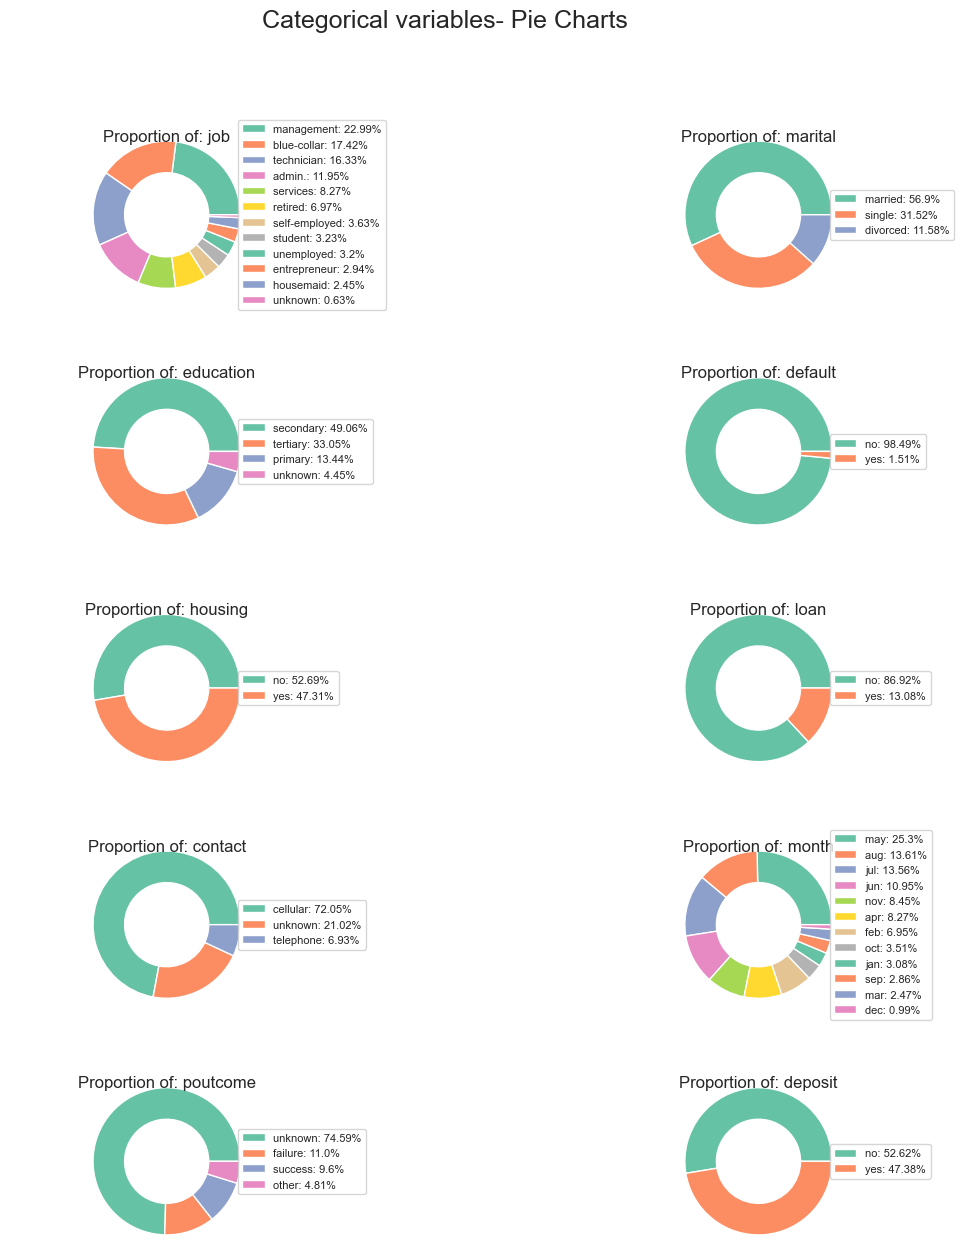

In [69]:
plotvar(df,0).pie() 

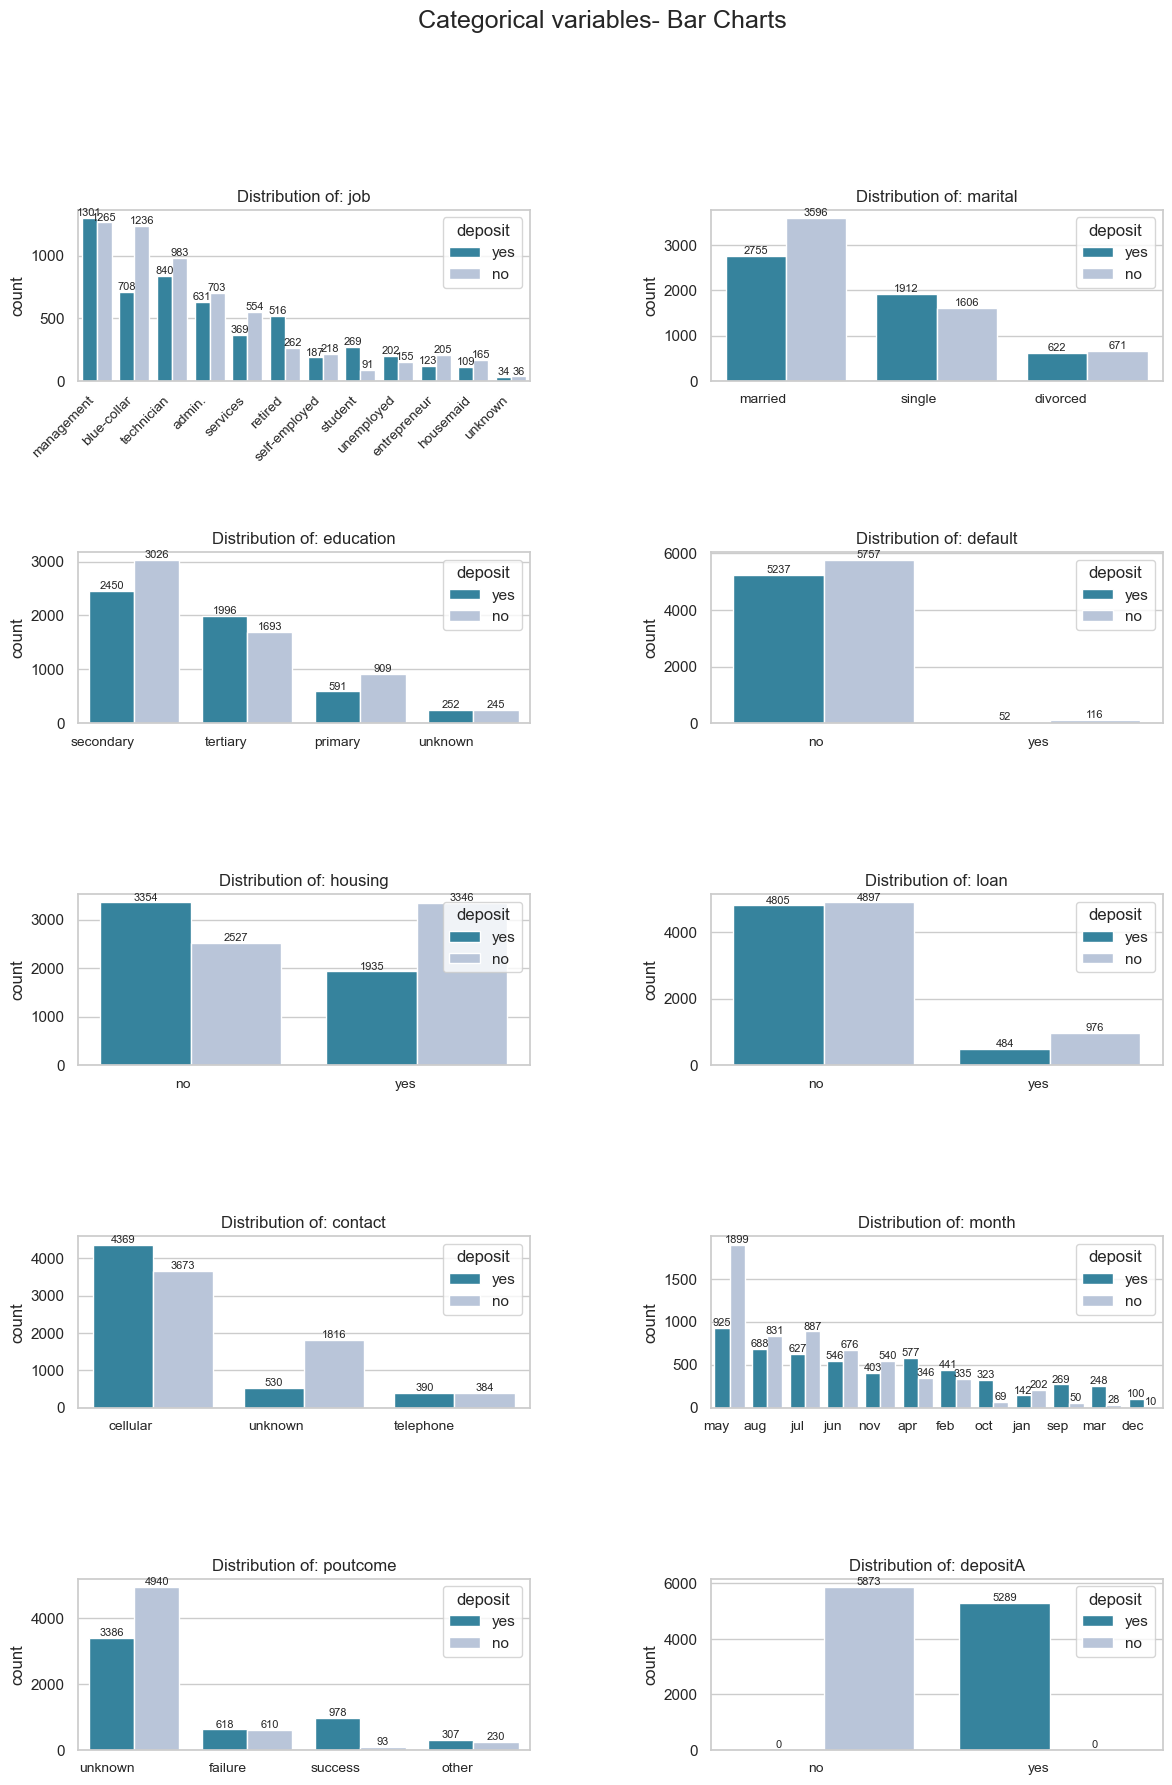

In [70]:
plotvar(df,"deposit").bar()  

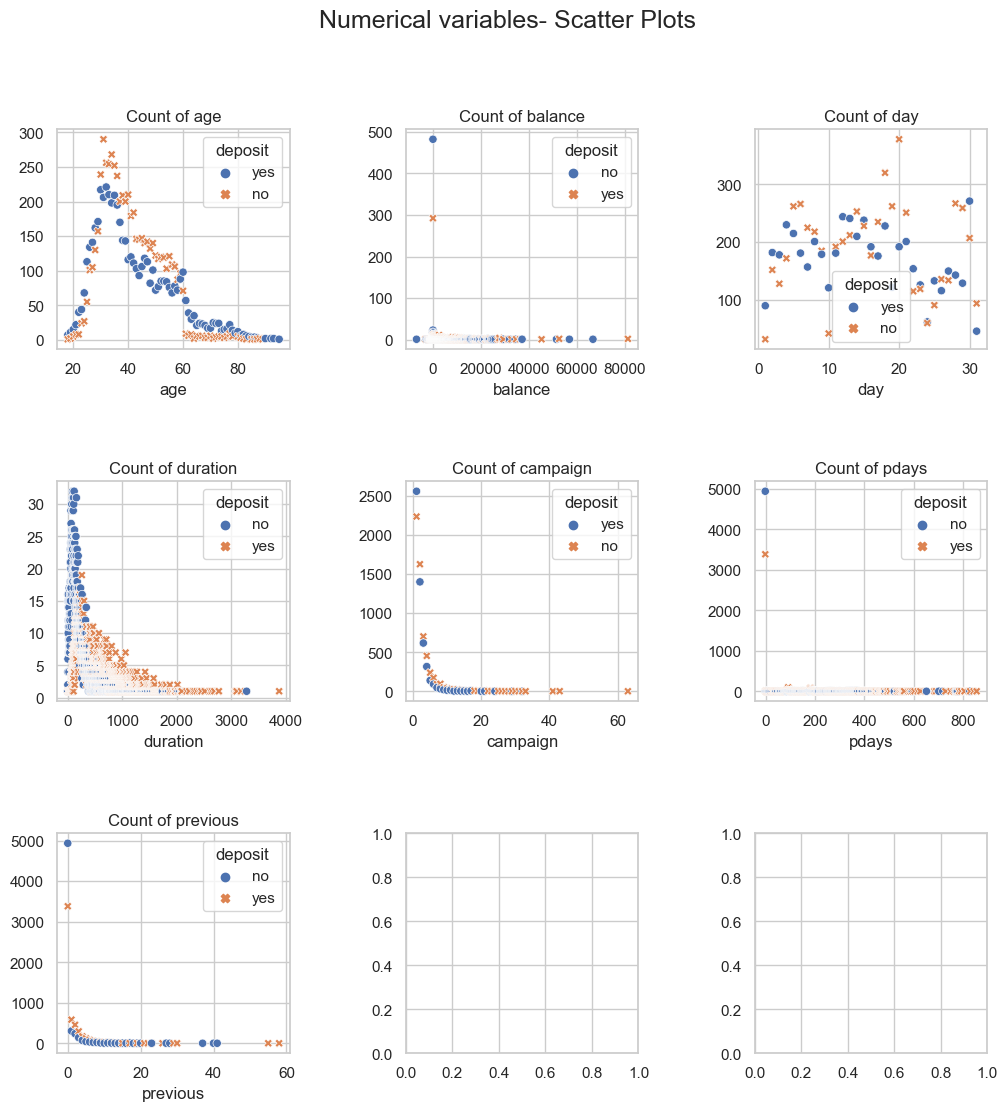

In [71]:
plotvar(df,"deposit").scatter()

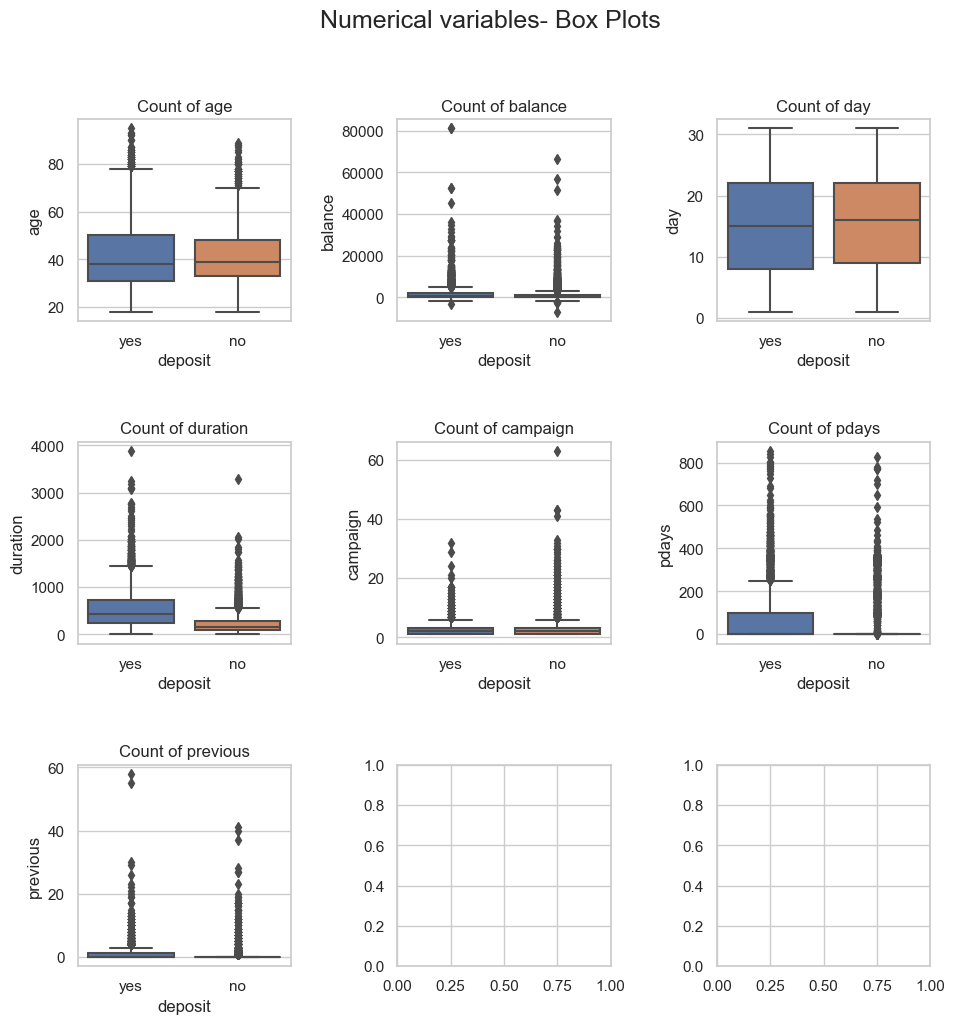

In [72]:
plotvar(df,"deposit").box()

In [73]:
# Add a new column 'client_id' as the index
df['client_id'] = range(1, len(df) + 1)
df

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1       0.0  unknown   
1       unknown    5   may      1467         1     -1       0.0  unknown   
2       unknown    5   may      1389         1     -1       0.0  unknown   
3       unknown    5   may       579         1     -1       0.0  unknown   
4       unknown    5   may       673         2     -1       0.0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1       0.0  unknown   
11158   unknown   16   jun        83         4     -1       0.0  unknown   
11159  cellular   19   aug       156         2     -1       0.0  unknown   
11160  cellular    8   may         9         2    172       5.0  failure   
11161  cellular    9   jul       628         1     -1       0.0  unknown   

      deposit depositA  client_id  
0         yes      yes          1  
1         yes      yes          2  
2         yes      yes          3  
3         yes      yes          4  
4         yes      yes          5  
...       ...      ...        ...  
11157      no       no      11158  
11158      no       no      11159  
11159      no       no      11160  
11160      no       no      11161  
11161      no       no      11162  

[11162 rows x 19 columns]

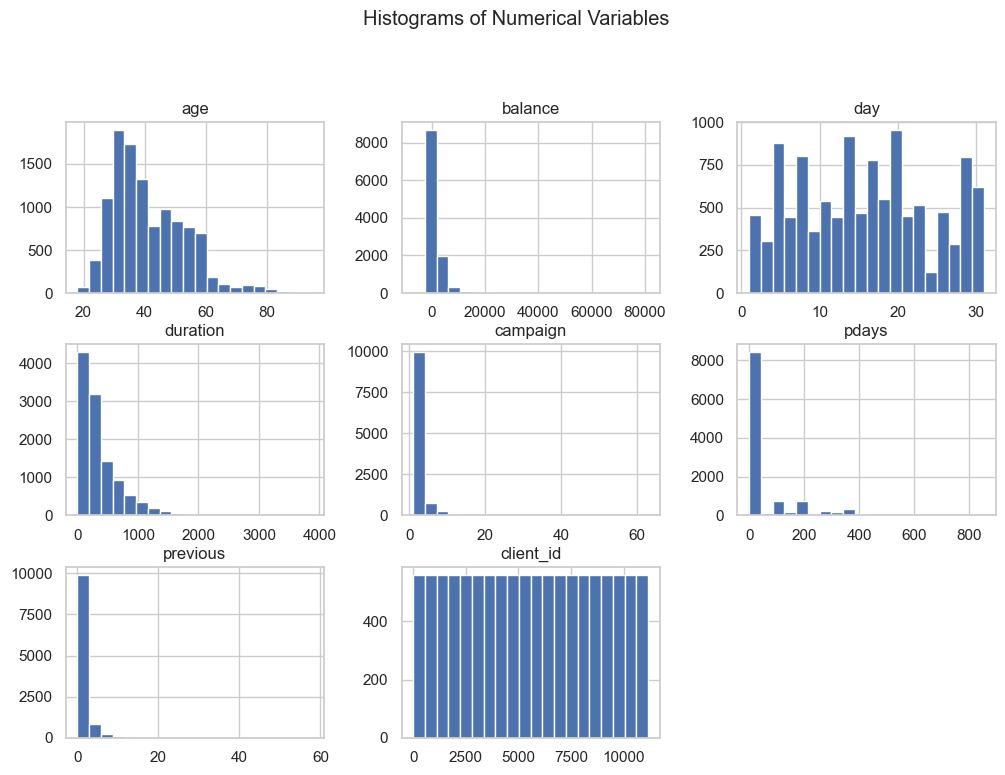

In [74]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Plot histograms for numerical variables
numerical_variables = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_variables].hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Numerical Variables', y=1.02)
plt.show()

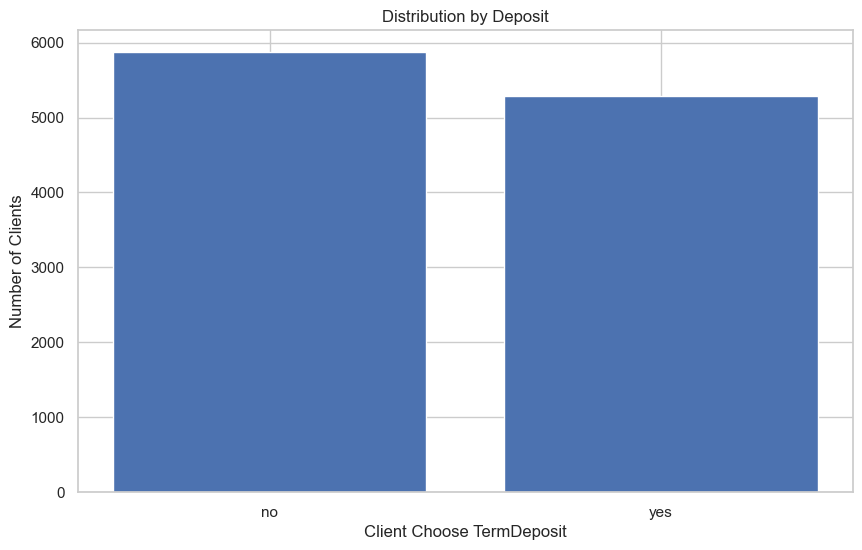

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [75]:
# dist. by attrition
left_count=df.groupby('deposit').count()
plt.bar(left_count.index.values, left_count['client_id'])
#plt.bar(left_count.index.values, data['EnvironmentSatisfaction'].mean())
plt.xlabel('Client Choose TermDeposit')
plt.ylabel('Number of Clients')
plt.title('Distribution by Deposit')
plt.show()
df.deposit.value_counts()

<h3><font color="#007090">Segmentation--balance vs duration, education, marital, job

In [76]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(8,6))

df['deposit'] = LabelEncoder().fit_transform(df['deposit'])
fig = make_subplots(rows=1, cols=2, subplot_titles=('Deposit = 0', 'Deposit = 1'))
fig = make_subplots(rows=1, cols=2, subplot_titles=('Deposit = 0', 'Deposit = 1'))

# Scatter plot for deposit = 0
trace0 = go.Scatter(
    x=df[df['deposit'] == 0]['duration'],
    y=df[df['deposit'] == 0]['balance'],
    mode='markers',
    marker=dict(size=10, opacity=1.0, color='rgb(253, 174, 216)'),
    showlegend=False
)

# Scatter plot for deposit = 1
trace1 = go.Scatter(
    x=df[df['deposit'] == 1]['duration'],
    y=df[df['deposit'] == 1]['balance'],
    mode='markers',
    marker=dict(size=10, opacity=1.0, color='rgb(165, 242, 242)'),
    showlegend=False
)

fig.add_trace(trace0, row=1, col=1)
fig.add_trace(trace1, row=1, col=2)

# Update layout
fig.update_layout(
    title_text='Facet Grid - Duration vs Balance',
    showlegend=True,
    xaxis=dict(title='Duration'),
    yaxis=dict(title='Balance')
)

# Show the plot
fig.show()

<Figure size 800x600 with 0 Axes>

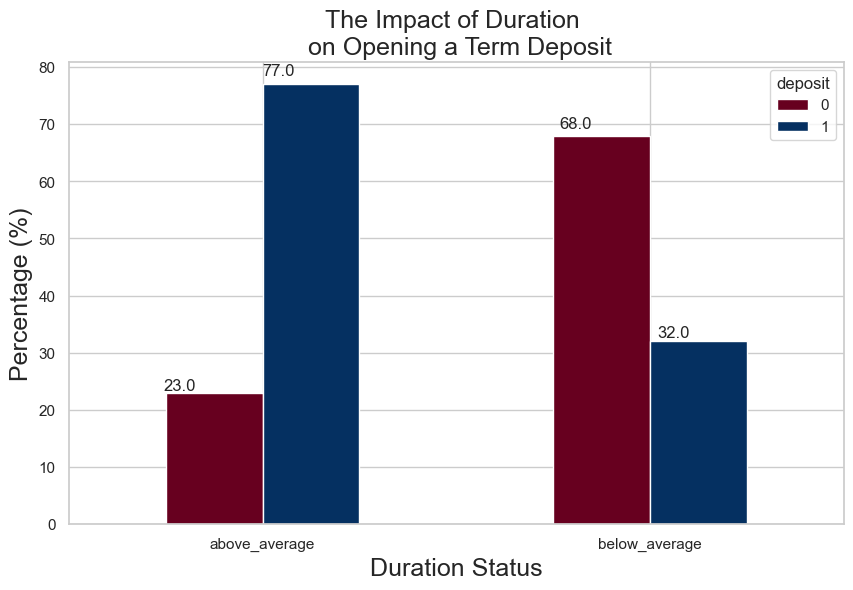

In [77]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n on Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    
plt.xticks(rotation='horizontal') # Label horizontal, yticks(rotation='verical')

plt.show()

In [78]:
# create job_groups
condintions=[
    (df['job'].isin(['admin.','technician','services','management','blue-collar','entrepreneur'])),
    (df['job'].isin(['unemployed','housemaid','self-employed'])),
    (df['job'].isin(['retired','student'])),
]

value=['employed','unemployed','not in labour force']

df['job_groups']=np.select(condintions,value, default='Unknow')
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day  ... duration  campaign  pdays  previous  poutcome deposit  depositA  \
0    5  ...     1042         1     -1       0.0   unknown       1       yes   
1    5  ...     1467         1     -1       0.0   unknown       1       yes   
2    5  ...     1389         1     -1       0.0   unknown       1       yes   
3    5  ...      579         1     -1       0.0   unknown       1       yes   
4    5  ...      673         2     -1       0.0   unknown       1       yes   

  client_id  duration_status job_groups  
0         1    above_average   employed  
1         2    above_average   employed  
2         3    above_average   employed  
3         4    above_average   employed  
4         5    above_average   employed  

[5 rows x 21 columns]

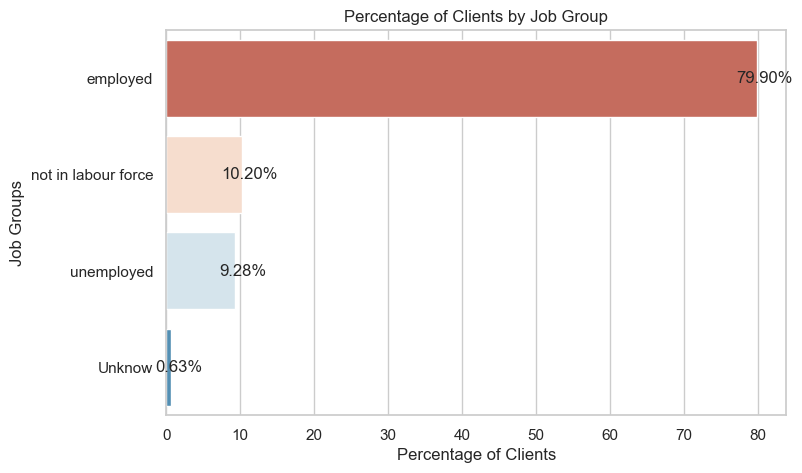

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder to convert 'deposit' column to numeric
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])

# Calculate the percentage for each job group
total_records = df.shape[0]  # Get the total number of records using shape[0]
job_groups = df['job_groups'].value_counts(normalize=True).reset_index()
job_groups.columns = ['job_groups', 'percentage']
job_groups['percentage'] *= 100

# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 5))

# Use sns.barplot
barplot = sns.barplot(x="percentage", y="job_groups", data=job_groups, label="Total", palette="RdBu")

# Add percentage labels
for p in barplot.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{width:.2f}%', ha='center', va='center')

plt.title('Percentage of Clients by Job Group', fontsize=12)
plt.xlabel("Percentage of Clients")
plt.ylabel("Job Groups")
plt.show()

In [80]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day  ... campaign  pdays  previous  poutcome  deposit depositA  client_id  \
0    5  ...        1     -1       0.0   unknown        1      yes          1   
1    5  ...        1     -1       0.0   unknown        1      yes          2   
2    5  ...        1     -1       0.0   unknown        1      yes          3   
3    5  ...        1     -1       0.0   unknown        1      yes          4   
4    5  ...        2     -1       0.0   unknown        1      yes          5   

  duration_status  job_groups  marital/education  
0   above_average    employed  married/secondary  
1   above_average    employed  married/secondary  
2   above_average    employed  married/secondary  
3   above_average    employed  married/secondary  
4   above_average    employed   married/tertiary  

[5 rows x 22 columns]

Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

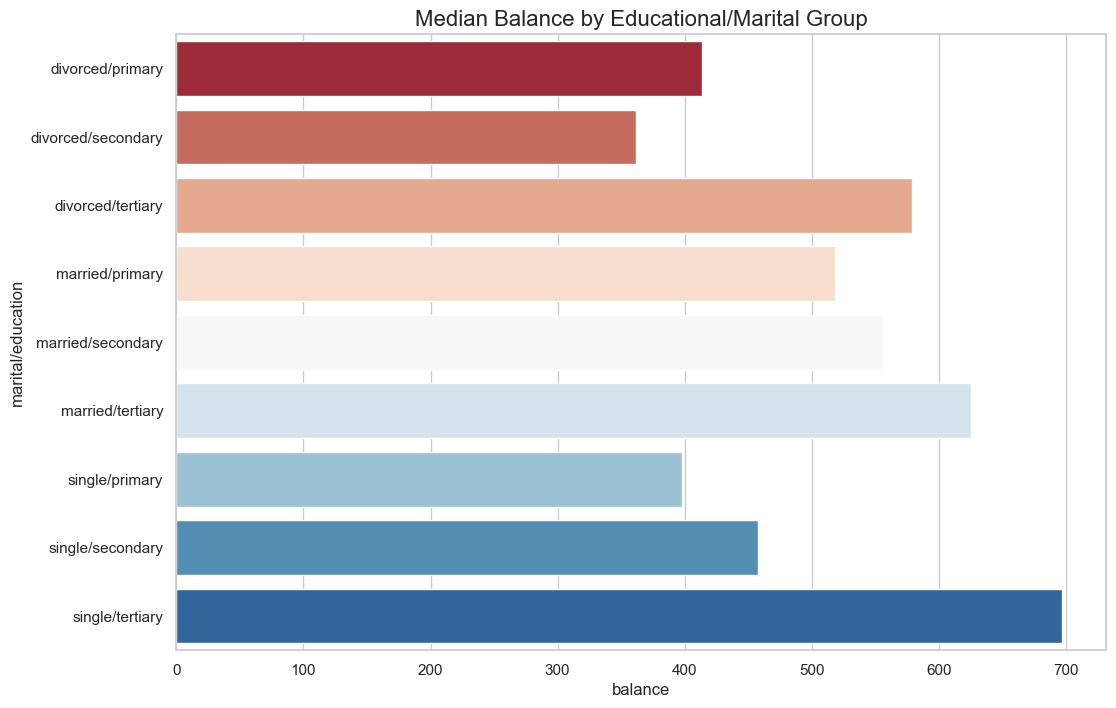

In [81]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))


sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

<h3><font color="#007090">Segmentation-- age, deposit yes ratio

In [82]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day  ... campaign  pdays  previous  poutcome  deposit depositA  client_id  \
0    5  ...        1     -1       0.0   unknown        1      yes          1   
1    5  ...        1     -1       0.0   unknown        1      yes          2   
2    5  ...        1     -1       0.0   unknown        1      yes          3   
3    5  ...        1     -1       0.0   unknown        1      yes          4   
4    5  ...        2     -1       0.0   unknown        1      yes          5   

  duration_status  job_groups  marital/education  
0   above_average    employed  married/secondary  
1   above_average    employed  married/secondary  
2   above_average    employed  married/secondary  
3   above_average    employed  married/secondary  
4   above_average    employed   married/tertiary  

[5 rows x 22 columns]

In [83]:
df['deposit']=df['deposit'].replace({1: 'yes', 0: 'no'})
df

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day  ... campaign  pdays  previous  poutcome  deposit  \
0       unknown    5  ...        1     -1       0.0   unknown      yes   
1       unknown    5  ...        1     -1       0.0   unknown      yes   
2       unknown    5  ...        1     -1       0.0   unknown      yes   
3       unknown    5  ...        1     -1       0.0   unknown      yes   
4       unknown    5  ...        2     -1       0.0   unknown      yes   
...         ...  ...  ...      ...    ...       ...       ...      ...   
11157  cellular   20  ...        1     -1       0.0   unknown       no   
11158   unknown   16  ...        4     -1       0.0   unknown       no   
11159  cellular   19  ...        2     -1       0.0   unknown       no   
11160  cellular    8  ...        2    172       5.0   failure       no   
11161  cellular    9  ...        1     -1       0.0   unknown       no   

      depositA client_id duration_status  job_groups  marital/education  
0          yes         1   above_average    employed  married/secondary  
1          yes         2   above_average    employed  married/secondary  
2          yes         3   above_average    employed  married/secondary  
3          yes         4   above_average    employed  married/secondary  
4          yes         5   above_average    employed   married/tertiary  
...        ...       ...             ...         ...                ...  
11157       no     11158   below_average    employed     single/primary  
11158       no     11159   below_average    employed  married/secondary  
11159       no     11160   below_average    employed   single/secondary  
11160       no     11161   below_average    employed  married/secondary  
11161       no     11162   above_average    employed  married/secondary  

[11162 rows x 22 columns]

In [84]:
#segmentation of 'balance'
positive_balances = df[df['balance'] >= 0]['balance']

quartiles = np.percentile(positive_balances, [25, 50, 75])

print(f"Quartile 1: 0 - {quartiles[0]}")
print(f"Quartile 2: {quartiles[0]} - {quartiles[1]}")
print(f"Quartile 3: {quartiles[1]} - {quartiles[2]}")
print(f"Quartile 4: {quartiles[2]} - {positive_balances.max()}")

Quartile 1: 0 - 183.25
Quartile 2: 183.25 - 625.0
Quartile 3: 625.0 - 1840.75
Quartile 4: 1840.75 - 81204


In [85]:
# Create a Balance Group
df["balance_group"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["balance"] < 0, "balance_group"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 183.25), "balance_group"] = "low"
    col.loc[(col["balance"] > 183.25) & (col["balance"] <= 1840.75), "balance_group"] = "middle"
    col.loc[col["balance"] > 1840.75, "balance_group"] = "high"
    
# balance by balance_status
negative = df["balance"].loc[df["balance_group"] == "negative"].values.tolist()
low = df["balance"].loc[df["balance_group"] == "low"].values.tolist()
middle = df["balance"].loc[df["balance_group"] == "middle"].values.tolist()
high = df["balance"].loc[df["balance_group"] == "high"].values.tolist()

In [86]:
# age Distribution

# Create a age Group
df["age_group"] = np.nan
age_g = [df]

for col in lst:
    col.loc[col["age"] <=25, "age_group"] = "age:25 and less"
    col.loc[(col["age"] >25) & (col["age"] <= 39), "age_group"] = "age:26-39"
    col.loc[(col["age"] > 39) & (col["age"] <= 49), "age_group"] = "age:40-49"
    col.loc[(col["age"] > 49) & (col["age"] <= 59), "age_group"] = "age:50-59"
    col.loc[col["age"] > 59, "age_group"] = "age:60+"
# Sort the DataFrame by the "age" column
df_s = df.sort_values(by='age_group')

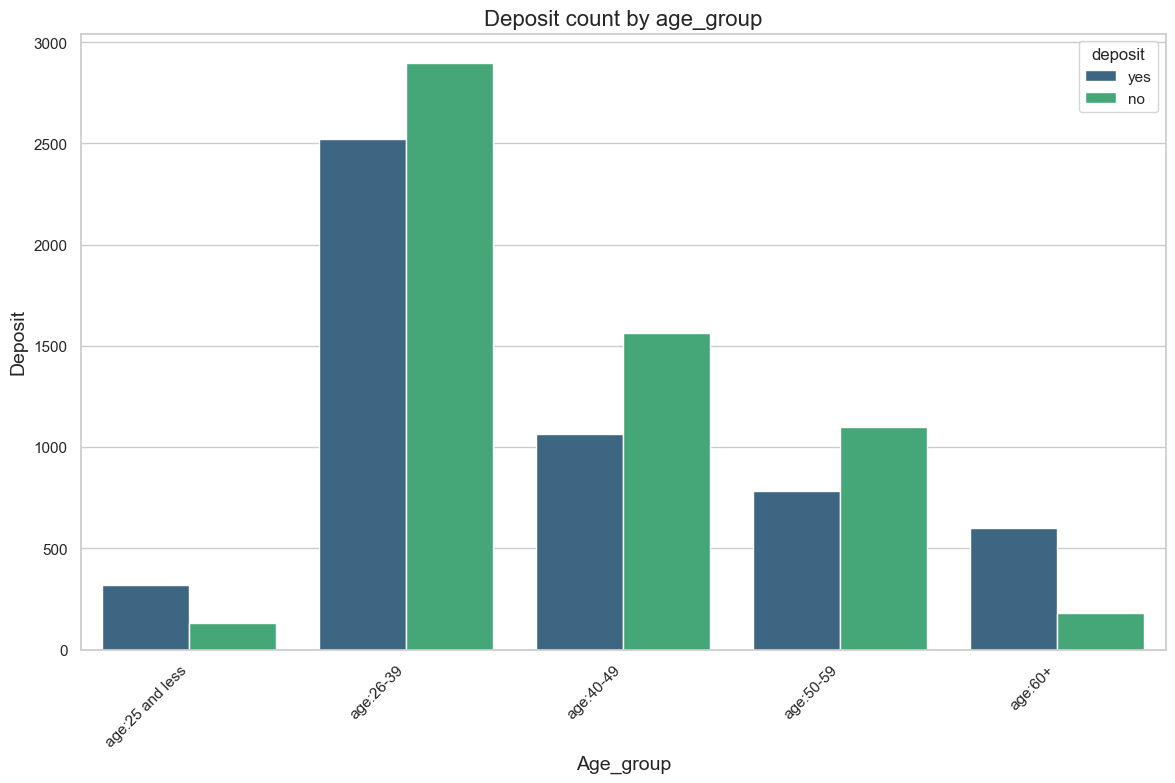

In [87]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
bar=sns.countplot(x='age_group', hue='deposit', data=df_s,   palette="viridis")
plt.title('Deposit count by age_group', fontsize=16)
plt.xlabel('Age_group', fontsize=14)
plt.ylabel('Deposit', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='deposit', title_fontsize='12')

plt.show()

In [88]:
Ratio=pd.pivot_table(df, values='client_id', index='age_group', columns='depositA',aggfunc='count',margins= True)
Ratio['ratio'] = (Ratio['yes'] / Ratio['All']).round(3)*100

print(Ratio)

depositA           no   yes    All  ratio
age_group                                
age:25 and less   130   320    450   71.1
age:26-39        2898  2521   5419   46.5
age:40-49        1565  1063   2628   40.4
age:50-59        1100   785   1885   41.6
age:60+           180   600    780   76.9
All              5873  5289  11162   47.4


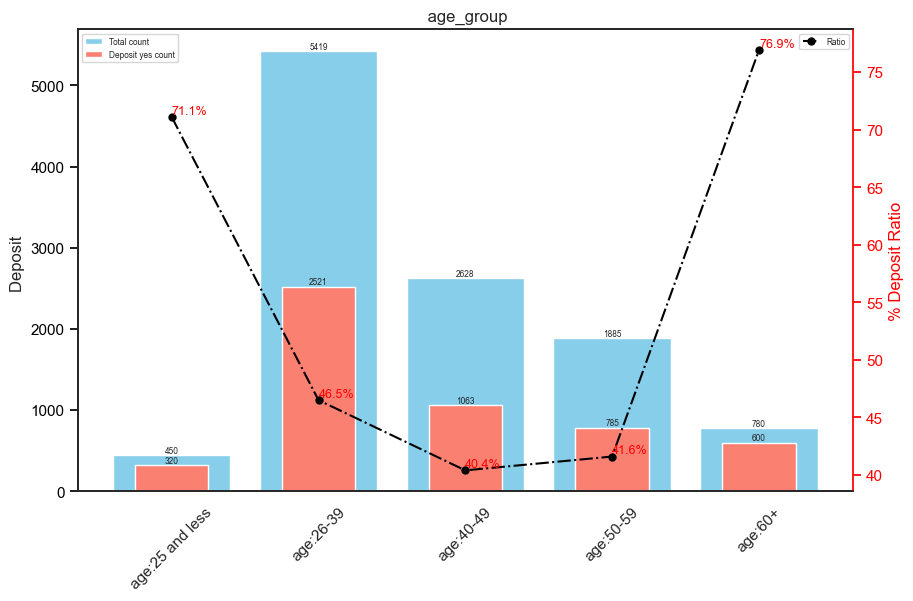

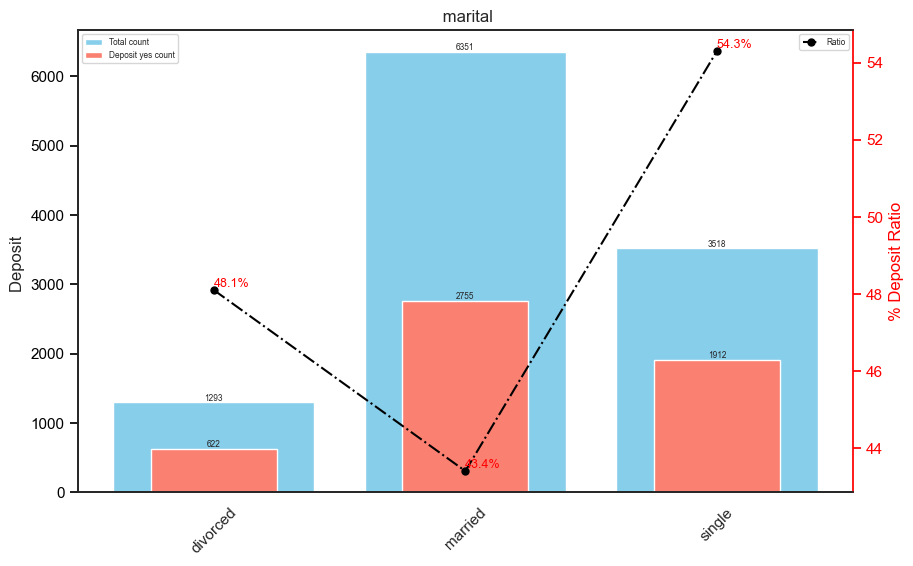

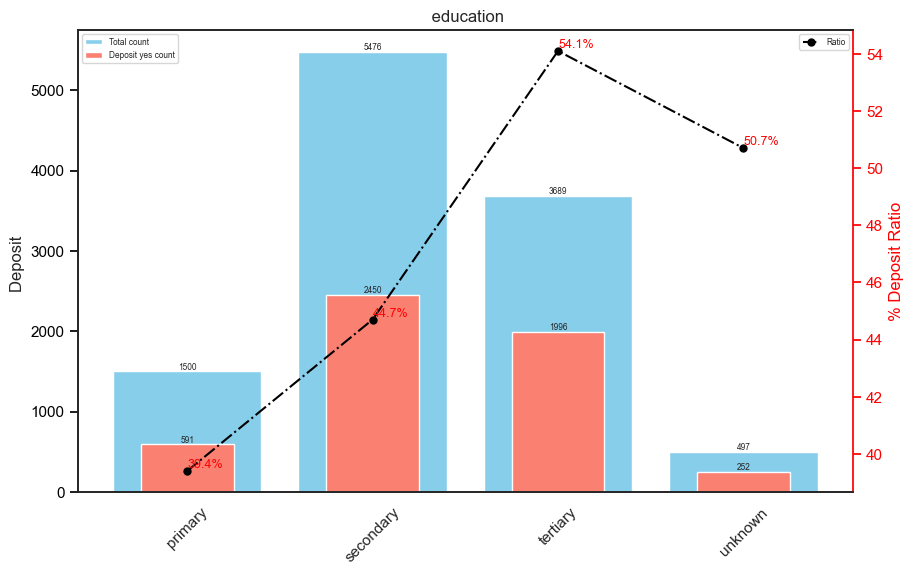

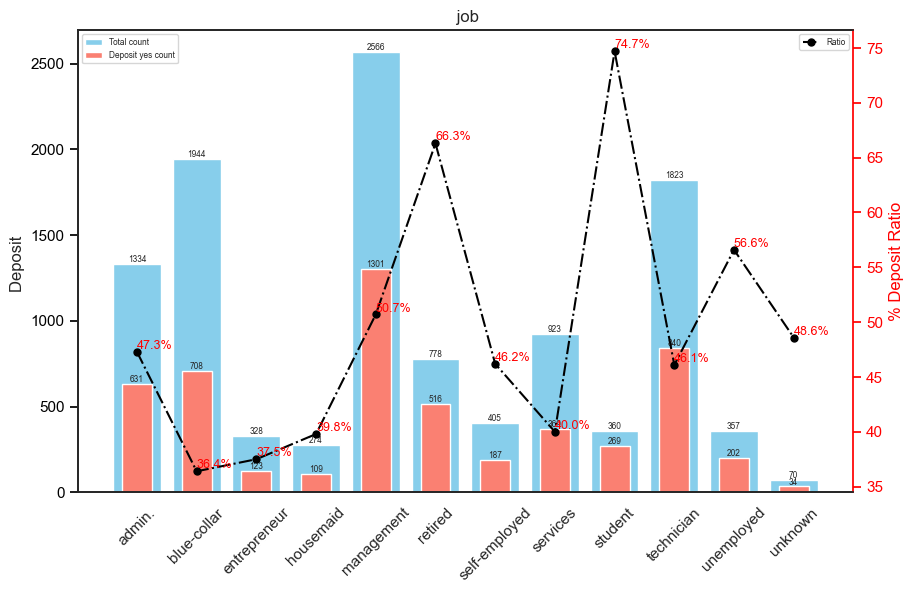

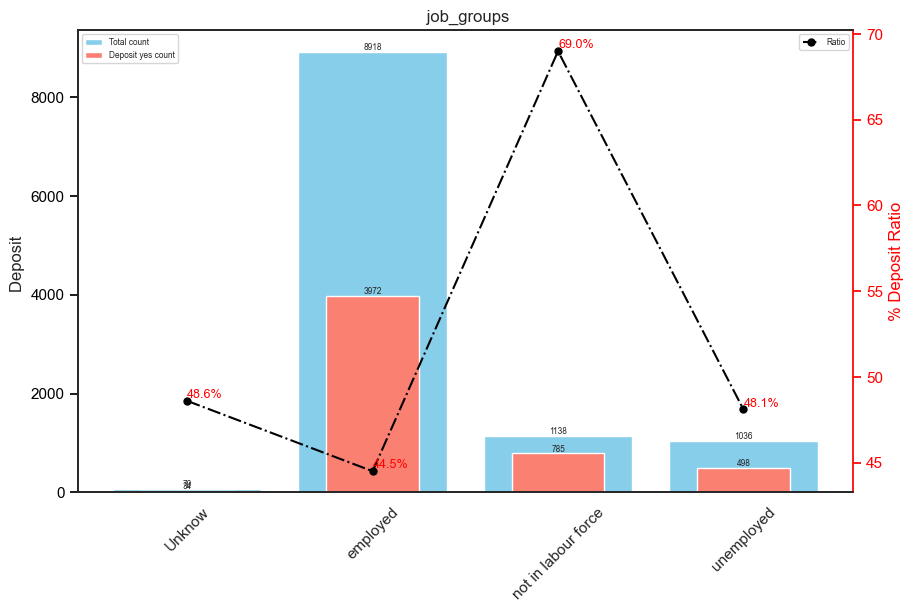

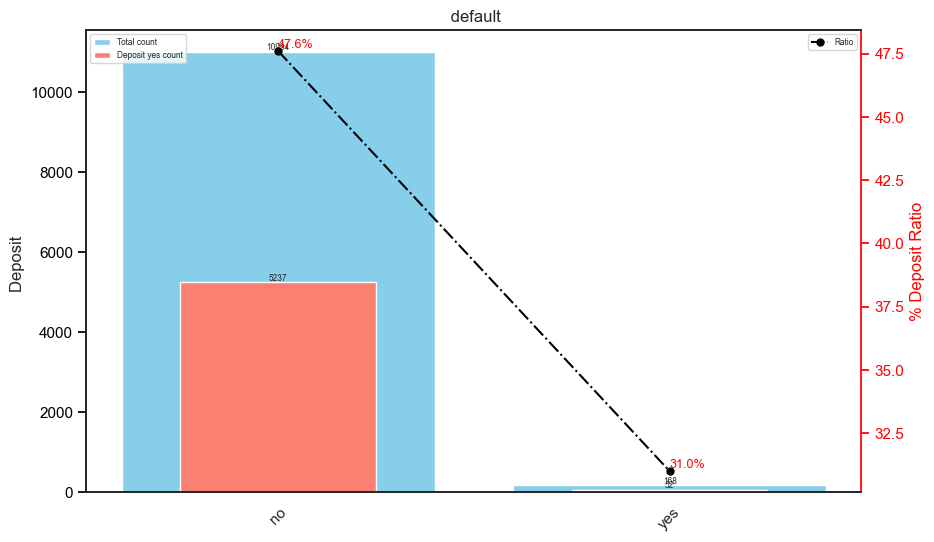

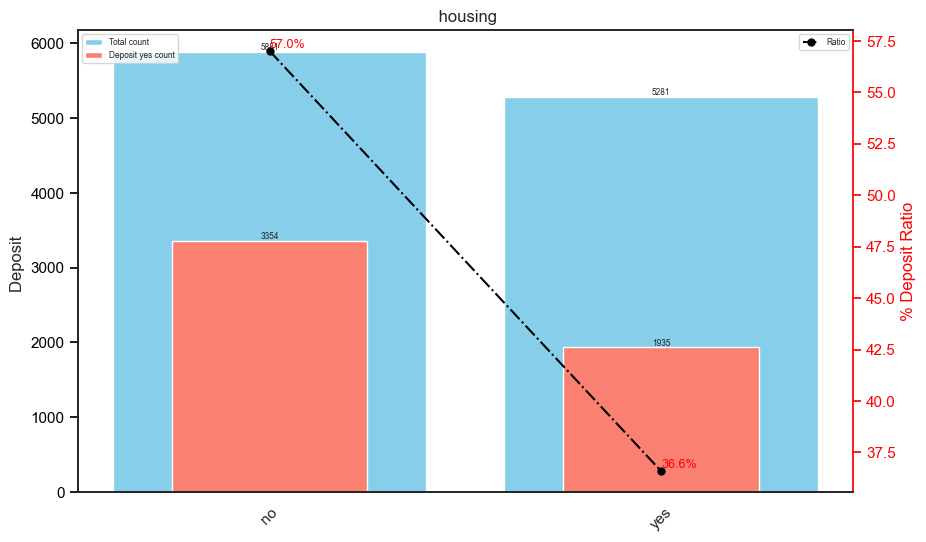

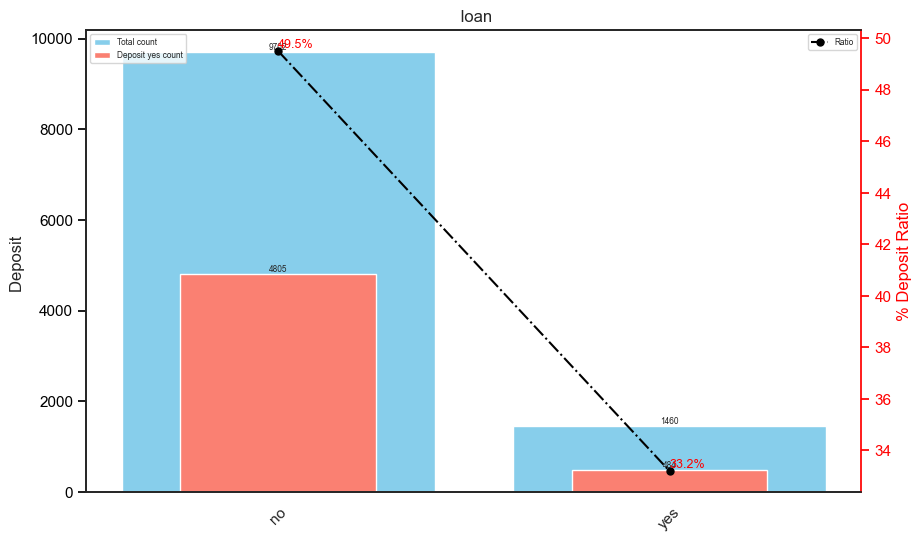

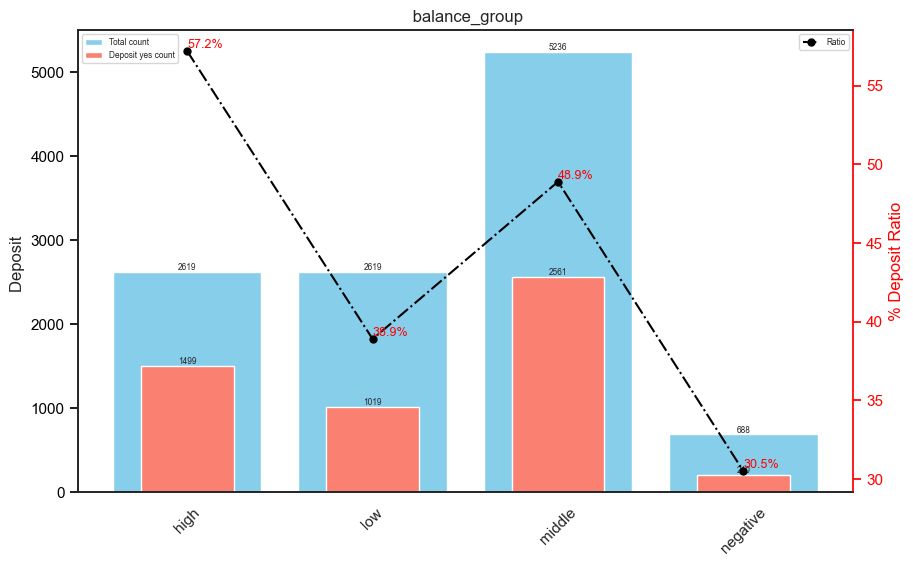

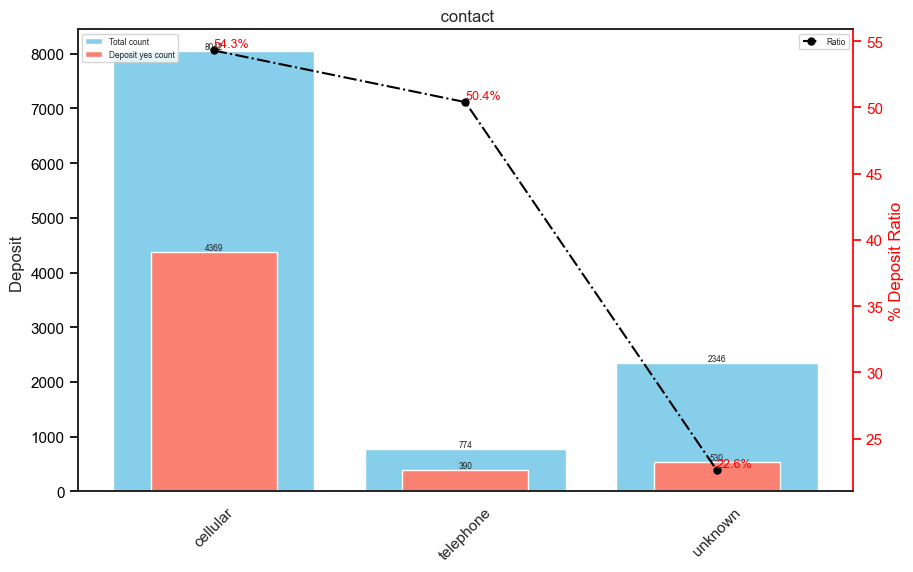

In [89]:
sns.set_style('white')
def multiple_bar_line(df, x_vars):
    # Create subplots based on the number of x-axis variables
    # Loop through each x-axis variable
    
    for i, x_var in enumerate(x_vars):
    
        #get columns vs deposit pivot_table#
        Ratio=pd.pivot_table(df, values='client_id', index=x_var, columns='depositA',aggfunc='count',margins= True)
        Ratio['ratio'] = (Ratio['yes'] / Ratio['All']).round(3)*100
        Ratio['Index_Column'] = Ratio.index
        Ratio = Ratio[Ratio['Index_Column'] != 'All'] # Drop the row where 'Index_Column' is 'ALL'
        
        # Create a figure and axis
        fig, ax1 = plt.subplots()
        plt.xticks (rotation=45)
        # Bar plot
        bar1=ax1.bar(Ratio['Index_Column'], Ratio['All'], color='skyblue', label='Total count',width =0.8)
        bar2=ax1.bar(Ratio['Index_Column'], Ratio['yes'], color='salmon', label='Deposit yes count',width =0.5)
        plt.bar_label(bar1,label_type='edge',fontsize=6)
        plt.bar_label(bar2,label_type='edge',fontsize=6)
        # Create a secondary y-axis for the line plot
        ax2 = ax1.twinx()
        ax2.plot(Ratio['Index_Column'], Ratio['ratio'], color='black', marker='o', ls='-.',markersize=5,label='Ratio')
        # Set labels and title and range
        ax1.set_ylabel('Deposit ' )
        ax2.set_ylabel('% Deposit Ratio', color='red')
        ax1.spines['right'].set_visible(False)
        ax2.spines['right'].set_color('red')
        ax1.tick_params('y',colors='black')
        ax2.tick_params('y',colors='red')
        plt.title(f' {x_var}'.capitalize())
        
        ax1.legend(loc='upper left', prop={'size': 6})
        ax2.legend(loc='upper right', prop={'size': 6})
        # Add percentage labels on the bars
        for i, v in enumerate( Ratio['ratio'].values):
            plt.text(i, v , f'{v:.1f}%',color='red', ha='left', va='bottom',fontsize=9 )
        plt.show()


# Example usage
x_variables = ['age_group','marital', 'education','job','job_groups','default','housing','loan','balance_group','contact']#,'campaign','previous',]
multiple_bar_line(df, x_variables) 

<h3><font color="#007090">Relationship between balance and other variables

<Axes: title={'center': 'Amount of Balance by Term Suscriptions'}, xlabel='default', ylabel='balance'>

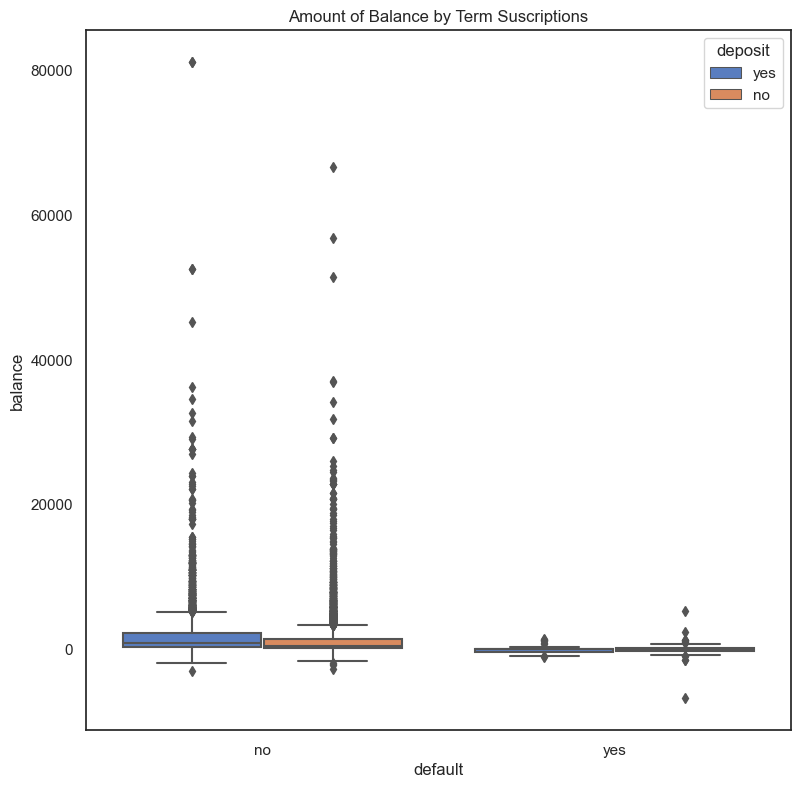

In [90]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)
g.set_title("Amount of Balance by Term Suscriptions")
g

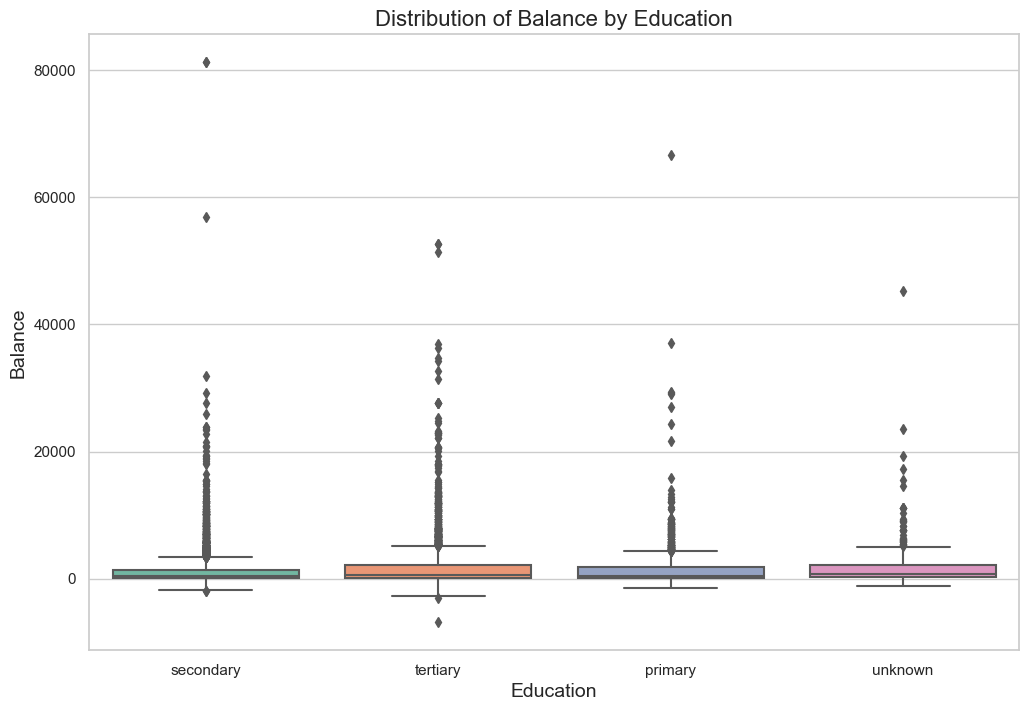

In [91]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a boxplot or violin plot
plt.figure(figsize=(12, 8))
sns.boxplot(x="education", y="balance", data=df, palette="Set2")
plt.title('Distribution of Balance by Education', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Balance', fontsize=14)
plt.show()

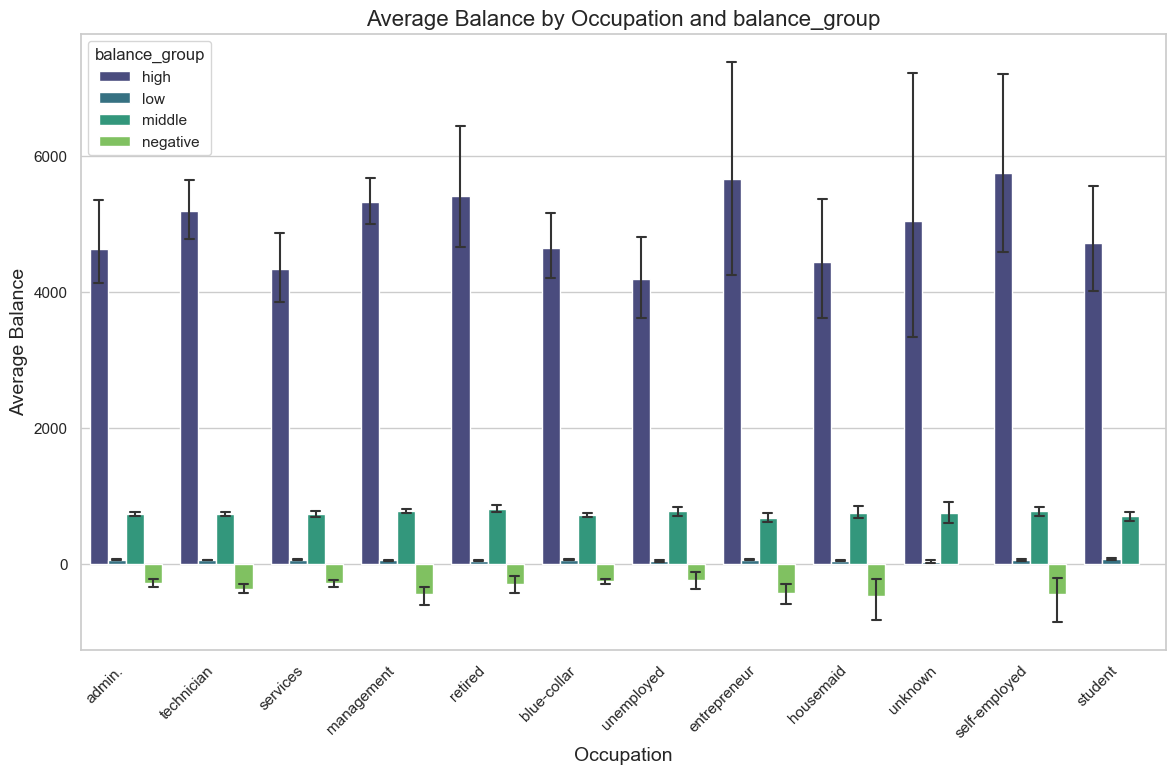

In [92]:
# Set the style for Seaborn plots
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
#sns.barplot(x='job', y='balance', hue='balance_group', data=df, errorbar=None, palette="viridis")
sns.barplot(x='job', y='balance', hue='balance_group', data=df, 
            dodge=True, palette="viridis", errcolor=".2", errwidth=1.5, capsize=0.1)

plt.title('Average Balance by Occupation and balance_group', fontsize=16)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Average Balance', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='balance_group', title_fontsize='12')
plt.show()

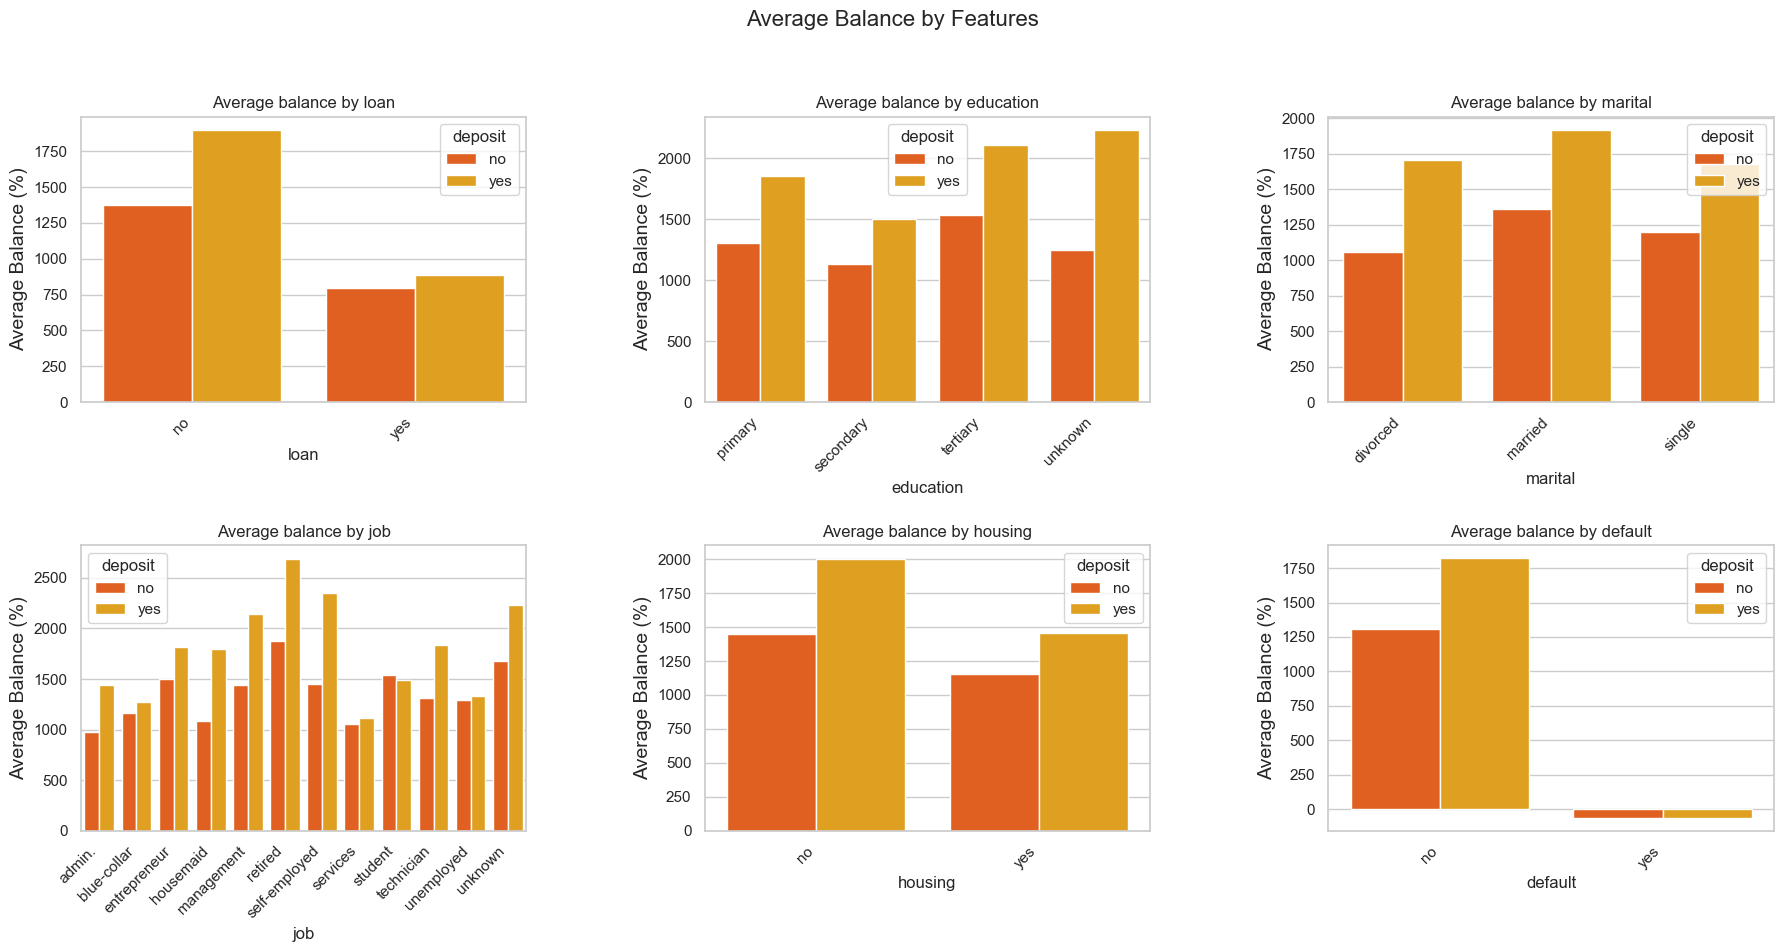

In [93]:
def create_multiple_barplots(data, x_vars, y_var, hue_var, ylabel, title, palette="autumn"):
    num_plots = len(x_vars)
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns for subplots

    # Set title for the entire grid of subplots
    fig.suptitle(title, fontsize=16)

    for i, x_var in enumerate(x_vars):
        row = i // 3  # Calculate row index for subplot
        col = i % 3   # Calculate column index for subplot
        
        # Calculate the mean of 'balance' grouped by x_var and hue_var
        mean_values = data.groupby([x_var, hue_var])['balance'].mean().reset_index()

        sns.barplot(x=x_var, y='balance', hue=hue_var, data=mean_values, 
                    palette=palette, ax=axes[row][col])
        
        axes[row][col].set_ylabel(ylabel, fontsize=14)
        axes[row][col].set_title(f'Average {y_var} by {x_var}')
        axes[row][col].set_xticklabels(mean_values[x_var].unique(), rotation=45, ha='right')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplot layout and position the title
    plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Adjust spacing between subplots
    plt.show()

# Example usage with multiple x-axis variables
x_variables = ["loan", "education", "marital", "job", "housing", "default"]
create_multiple_barplots(df, x_variables, "balance", "deposit", 'Average Balance (%)', 'Average Balance by Features')

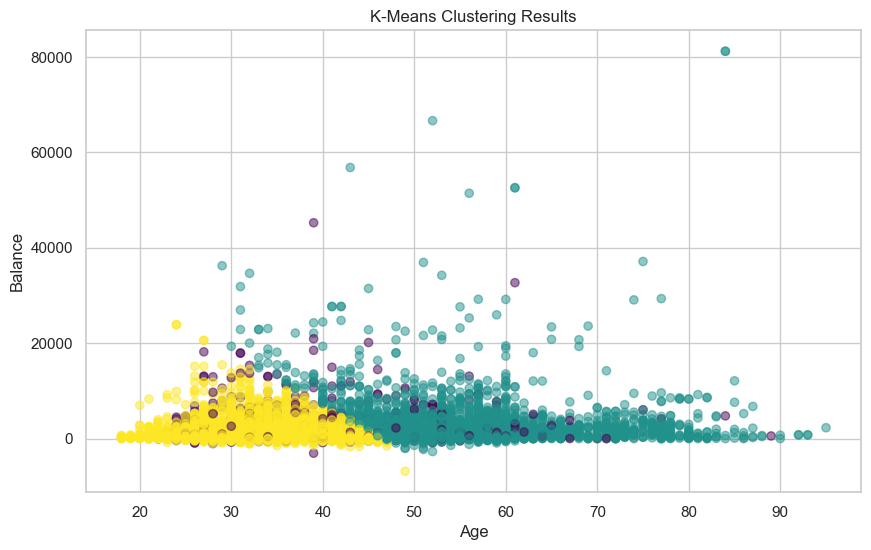

In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numerical features for clustering
numerical_features = df[['age', 'balance', 'duration', 'campaign']]

# Standardize numerical features
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Choose the number of clusters (K)
k = 3

# Explicitly set the value of n_init to suppress the warning
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(numerical_features_scaled)

# Visualize the clusters
plt.scatter(df['age'], df['balance'], c=df['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Balance')
plt.title('K-Means Clustering Results')
plt.show()

<h1><font color="#007090">Data Manipulation and Modeling</h1>

<h3><font color="#007090">Relationship between deposit and poutcome, deposit and month

In [95]:
from scipy.stats import chi2_contingency

#use chisquare do categrocial target and other categorical marital', 'education', 'default', 'housing', 'loan

# Define the list of variables to test  dependent no relationships
categorical_variables = ['marital', 'education', 'default', 'housing', 'loan','poutcome']

# Iterate over each variable and perform chi-square test
for variable in categorical_variables:
    # Build the contingency table
    contingency_table = pd.crosstab(df[variable], df['deposit'])

    # Perform the chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Display the results
    print(f"Chi-square test for {variable} and deposit:")
    print(f"Chi2 Stat: {chi2_stat}")
    print(f"P-value: {p_value}")
    print(f"Degrees of Freedom: {dof}")
    print("")

    # Perform significance test based on p-value
    alpha = 0.05
    if p_value < alpha:
        print("The variables are dependent.")
    else:
        print("The variables are independent.")
    print("\n---\n")

Chi-square test for marital and deposit:
Chi2 Stat: 109.58335610012479
P-value: 1.600576988089358e-24
Degrees of Freedom: 2

The variables are dependent.

---

Chi-square test for education and deposit:
Chi2 Stat: 122.77008967211442
P-value: 1.9534186354212715e-26
Degrees of Freedom: 3

The variables are dependent.

---

Chi-square test for default and deposit:
Chi2 Stat: 17.808573693473093
P-value: 2.4428001791928345e-05
Degrees of Freedom: 1

The variables are dependent.

---

Chi-square test for housing and deposit:
Chi2 Stat: 463.1892407533161
P-value: 9.724394114495535e-103
Degrees of Freedom: 1

The variables are dependent.

---

Chi-square test for loan and deposit:
Chi2 Stat: 135.83217051738103
P-value: 2.171286879630289e-31
Degrees of Freedom: 1

The variables are dependent.

---

Chi-square test for poutcome and deposit:
Chi2 Stat: 1004.635780185333
P-value: 1.7761850102620281e-217
Degrees of Freedom: 3

The variables are dependent.

---



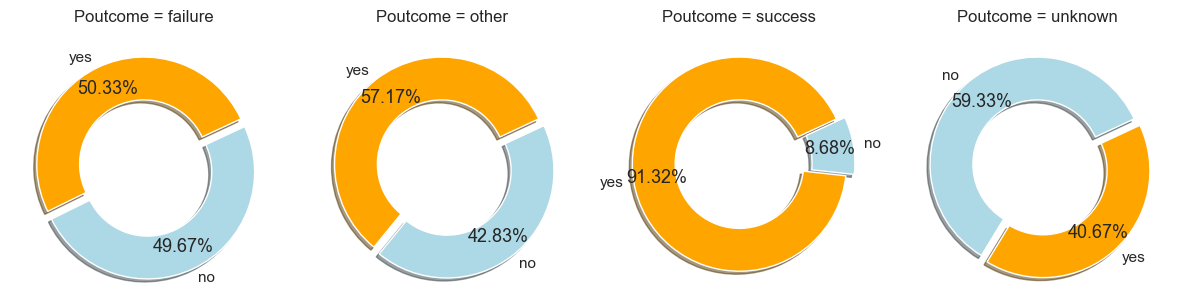

In [96]:
## deposit by features
def create_donut_charts(dataframe, group_column, value_column, colors): 
    plt.rcParams['font.size'] = 13

    value_counts = dataframe.groupby(group_column)[value_column].value_counts()
    unique_values_count = df[group_column].nunique()
    fig, axs = plt.subplots(1, unique_values_count, 
                            figsize=(12, 5))

    for i, (value, counts) in enumerate(value_counts.groupby(level=0)):
        labels = counts.index.get_level_values(value_column)
        sizes = counts.values

        wedges, texts, autotexts = axs[i].pie(sizes, labels=labels, autopct='%1.2f%%',pctdistance=0.78, shadow=True,
                                              explode=[0, 0.08], startangle=25, wedgeprops=dict(width=0.4, edgecolor='w'),
                                              colors=[colors[x] for x in labels])

        centre_circle = plt.Circle((0, 0), 0.3, color='white', linewidth=0)
        axs[i].add_artist(centre_circle)

        axs[i].set_aspect('equal')
        axs[i].set_title(f'{group_column.capitalize()} = {value}')

    plt.tight_layout()
    plt.show()

# usage:
colors_deposit = {'yes': 'orange', 'no': 'lightblue'}
##create_donut_charts(df, X, 'deposit', colors_deposit)
create_donut_charts(df, 'poutcome', 'deposit', colors_deposit)

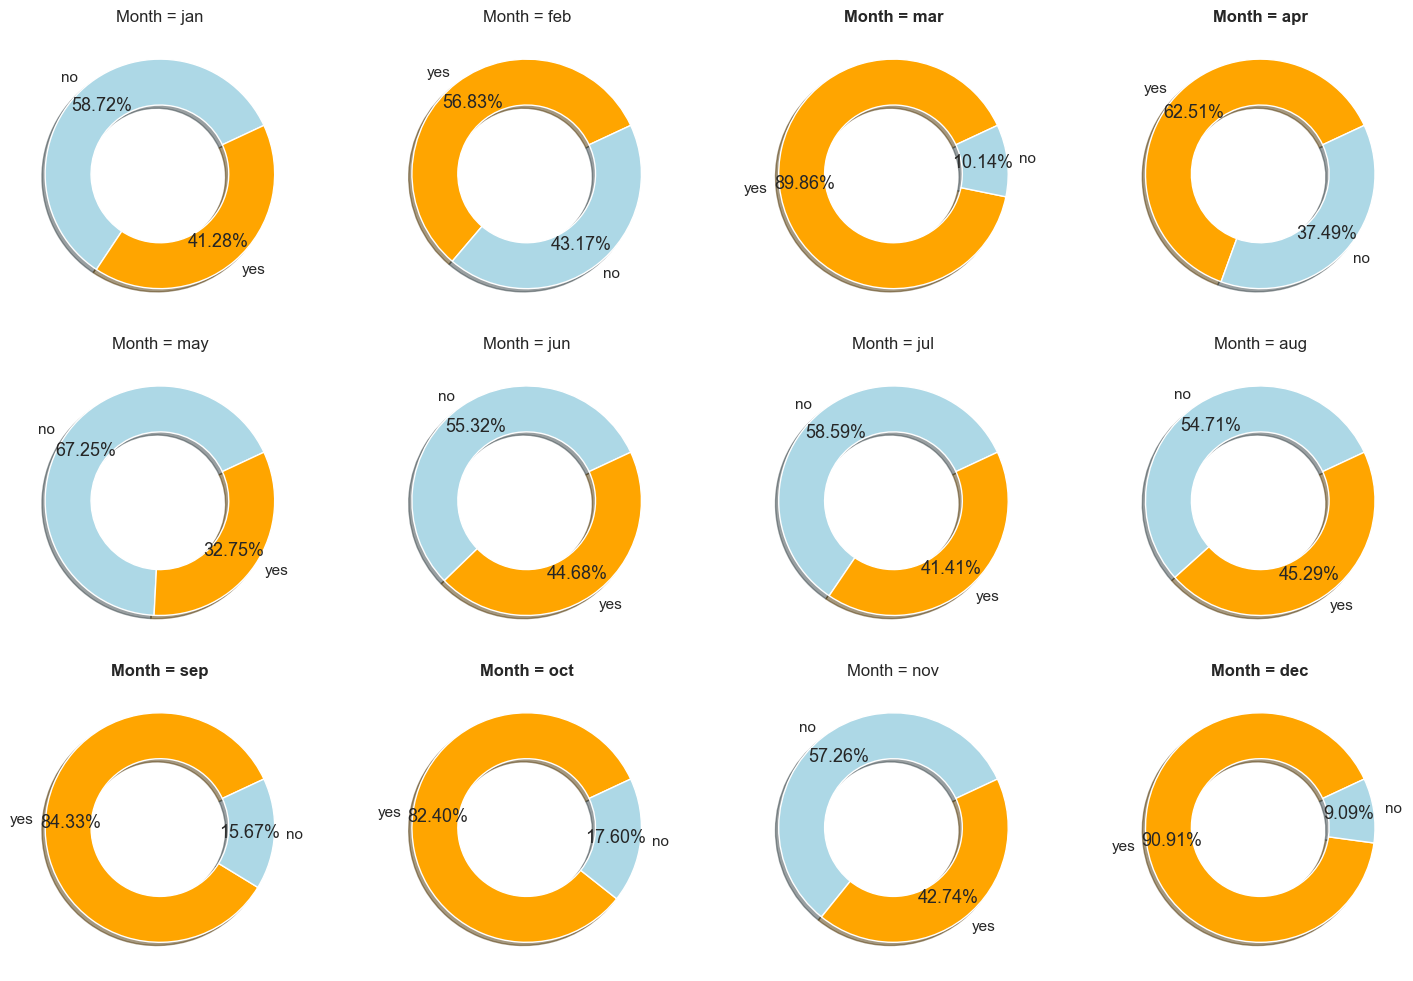

In [97]:
def create_donut_charts(dataframe, group_column, value_column, colors):
    mpl.rcParams['font.size'] = 13

    # Define the desired order of months
    desired_month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

    # Get unique months from the DataFrame in the desired order
    unique_months = dataframe[group_column].unique()
    unique_months = sorted(unique_months, key=lambda x: desired_month_order.index(x))

    # Create the subplots layout based on the number of unique months
    num_rows = 3
    num_cols = 4
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    for i, month in enumerate(unique_months):
        row = i // num_cols
        col = i % num_cols

        ax = axs[row, col]
        counts = dataframe[dataframe[group_column] == month][value_column].value_counts()

        labels = counts.index
        sizes = counts.values

        percentage_yes = counts.get('yes', 0) / sum(counts.values) * 100  # Calculate percentage of 'deposit = yes'

        ax.pie(sizes, labels=labels, autopct='%1.2f%%',
               pctdistance=0.78, shadow=True, startangle=25,
               wedgeprops=dict(width=0.4, edgecolor='w'),
               colors=[colors[x] for x in labels])

        centre_circle = plt.Circle((0, 0), 0.3, color='white', linewidth=0)
        ax.add_artist(centre_circle)

        ax.set_aspect('equal')
        title_text = f'{group_column.capitalize()} = {month}'

        if percentage_yes > 60:  # Highlight title if 'deposit = yes' percentage is higher than 60%
            ax.set_title(title_text, weight='bold')  # Set the title text to bold

        else:
            ax.set_title(title_text)  # Set the title text to normal

    # Hide remaining empty subplots if any
    for j in range(len(unique_months), num_rows * num_cols):
        axs.flatten()[j].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have defined df and colors_deposit
create_donut_charts(df, 'month', 'deposit', colors_deposit)


In [98]:
#re-import dataset
df_copy_M

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1       0.0  unknown   
1       unknown    5   may      1467         1     -1       0.0  unknown   
2       unknown    5   may      1389         1     -1       0.0  unknown   
3       unknown    5   may       579         1     -1       0.0  unknown   
4       unknown    5   may       673         2     -1       0.0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1       0.0  unknown   
11158   unknown   16   jun        83         4     -1       0.0  unknown   
11159  cellular   19   aug       156         2     -1       0.0  unknown   
11160  cellular    8   may         9         2    172       5.0  failure   
11161  cellular    9   jul       628         1     -1       0.0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]

In [99]:
df_copy_M.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     3
poutcome     0
deposit      0
dtype: int64

In [100]:
df=df_copy_M
df['previous'].fillna(df['previous'].median(), inplace=True)

In [101]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [102]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# model 3 


# Assuming your dataset is named df
Y = df["deposit"].apply(lambda x: 1 if x == 'yes' else 0).values
X = df[['duration','previous', 'campaign', 'job', 'marital', 'education', 'default', 'housing', 'loan']]

# Convert categorical variables to dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Add a constant column
X_encoded = sm.add_constant(X_encoded)

# Fit the Logit model  confusion matrix 
model = sm.Logit(Y, X_encoded).fit()

# Print the prediction table
print("Prediction Table:")
print(model.pred_table())

# Print the fitted values
print("Fitted Values:")
print(model.fittedvalues)

# Print the model summary
print("Model 3 Summary:")
print(model.summary())

# Print the model parameters
print("Model 3 Parameters:")
print(model.params)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Assumed DataFrame 'df' with columns as described
# Impute missing values in 'previous' column with median
df['previous'] = df['previous'].fillna(df['previous'].median())

# Define the list of numerical and categorical columns
numerical_cols = ['age', 'balance', 'duration', 'previous']
categorical_cols = ['job', 'education', 'housing', 'loan', 'campaign',"poutcome"]

# Initialize lists to store accuracy scores and variable combinations
accuracy_scores = []
variable_combinations = []

# Create combinations of numerical columns
for r in range(1, len(numerical_cols) + 1):
    combos = combinations(numerical_cols, r)
    for combo in combos:
        selected_numerical = list(combo)
        
        # Combine numerical and categorical columns
        selected_features = selected_numerical + categorical_cols
        X = df[selected_features]
        y = df['deposit']  # Assuming 'deposit' is the target variable
        
        # Handling categorical variables
        X_encoded = pd.get_dummies(X, drop_first=True)
        
        # Split data into train and test sets (70% train, 30% test)
        X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
        
        # Initialize and fit logistic regression model
        log_reg = LogisticRegression(max_iter=1000)
        log_reg.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = log_reg.predict(X_test)
        
        # Calculate accuracy and store
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        variable_combinations.append(selected_features)

# Find the combination with the highest accuracy
max_accuracy_index = accuracy_scores.index(max(accuracy_scores))
best_combination = variable_combinations[max_accuracy_index]
best_accuracy = accuracy_scores[max_accuracy_index]

# Print the best combination and its accuracy
print(f"Best combination: {best_combination} - Accuracy: {best_accuracy:.4f}")

In [ ]:
# Extract features and target variable based on the best combination
selected_features = best_combination  # Use best_combination directly
X_best = df[selected_features]
X_best_encoded = pd.get_dummies(X_best, drop_first=True)
y_best = df['deposit']

# Ensure that all numerical columns are included in the best_combination
numerical_cols_in_combination = [col for col in numerical_cols if col in selected_features]

# Impute missing values and scale numerical features
imputer = SimpleImputer(strategy='median')
X_best_encoded[numerical_cols_in_combination] = imputer.fit_transform(X_best_encoded[numerical_cols_in_combination])

# Scale numerical features
scaler = StandardScaler()
X_best_encoded[numerical_cols_in_combination] = scaler.fit_transform(X_best_encoded[numerical_cols_in_combination])

# Initialize and fit logistic regression model on the entire dataset
final_log_reg = LogisticRegression(max_iter=1000)
final_log_reg.fit(X_best_encoded, y_best)

# Print the logistic regression summary
intercept = final_log_reg.intercept_[0]
coefficients = final_log_reg.coef_[0]

print("\nLogistic Regression Summary:")
print(f"Intercept: {intercept:.4f}")
for feature, coef in zip(X_best_encoded.columns, coefficients):
    print(f"{feature}: {coef:.4f}")


In [103]:
df['deposit'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
df

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1       0.0  unknown   
1       unknown    5   may      1467         1     -1       0.0  unknown   
2       unknown    5   may      1389         1     -1       0.0  unknown   
3       unknown    5   may       579         1     -1       0.0  unknown   
4       unknown    5   may       673         2     -1       0.0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1       0.0  unknown   
11158   unknown   16   jun        83         4     -1       0.0  unknown   
11159  cellular   19   aug       156         2     -1       0.0  unknown   
11160  cellular    8   may         9         2    172       5.0  failure   
11161  cellular    9   jul       628         1     -1       0.0  unknown   

       deposit  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
11157        0  
11158        0  
11159        0  
11160        0  
11161        0  

[11162 rows x 17 columns]

In [104]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


# Extract features and target variable based on the best combination
selected_features = best_combination  # Use best_combination directly
X_best = df[selected_features]
X_best_encoded = pd.get_dummies(X_best, drop_first=True)
y_best = df['deposit']

# Ensure that all numerical columns are included in the best_combination
numerical_cols_in_combination = [col for col in numerical_cols if col in selected_features]

# Impute missing values and scale numerical features
imputer = SimpleImputer(strategy='median')
X_best_encoded[numerical_cols_in_combination] = imputer.fit_transform(X_best_encoded[numerical_cols_in_combination])

# Scale numerical features
scaler = StandardScaler()
X_best_encoded[numerical_cols_in_combination] = scaler.fit_transform(X_best_encoded[numerical_cols_in_combination])

# Initialize and fit logistic regression model on the entire dataset
final_log_reg = LogisticRegression(max_iter=1000)
final_log_reg.fit(X_best_encoded, y_best)

# Make predictions on the entire dataset
y_probs = final_log_reg.predict_proba(X_best_encoded)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_best, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


NameError: name 'best_combination' is not defined

Accuracy of KNN model with 1 neighbors: 0.69
Accuracy of KNN model with 2 neighbors: 0.68
Accuracy of KNN model with 3 neighbors: 0.72
Accuracy of KNN model with 4 neighbors: 0.72
Accuracy of KNN model with 5 neighbors: 0.74
Accuracy of KNN model with 6 neighbors: 0.72
Accuracy of KNN model with 7 neighbors: 0.73
Accuracy of KNN model with 8 neighbors: 0.73
Accuracy of KNN model with 9 neighbors: 0.74
Accuracy of KNN model with 10 neighbors: 0.73


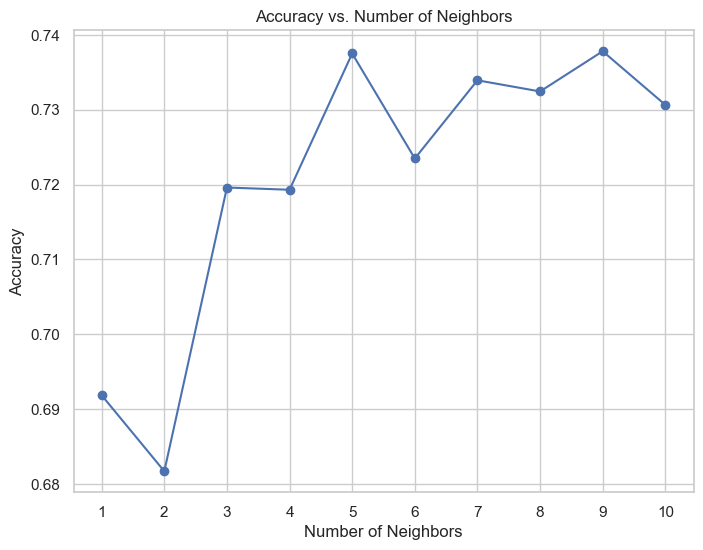

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

import matplotlib.pyplot as plt


# Assuming 'df' contains your dataset

# Selecting features and target variable
X = df[['age', 'duration', 'previous', 'job', 'education', 'housing',
      'loan', 'campaign']]
y = df['deposit']

# Perform one-hot encoding for categorical variables
categorical_cols = ['job', 'education', 'housing', 'loan']
X_encoded = pd.get_dummies(X, columns=categorical_cols)

# Impute missing values (NaNs) with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
def knn_with_various_neighbors(X_train, X_test, y_train, y_test):
    # Values of n_neighbors to test
    n_neighbors = list(range(1, 11))
    
    # Store accuracy scores for different n_neighbors values
    accuracy_scores = []

    for n in n_neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = knn.predict(X_test)
        
        # Calculate accuracy of the model and append to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        print(f"Accuracy of KNN model with {n} neighbors: {accuracy:.2f}")

    return accuracy_scores

accuracy_scores = knn_with_various_neighbors(X_train, X_test, y_train, y_test)

# Plotting the accuracy scores
n_neighbors_values = range(1, 11)  
plt.figure(figsize=(8, 6))
plt.plot(n_neighbors_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(n_neighbors_values)  # Set x-axis ticks to be the values of n_neighbors
plt.grid(True)
plt.show()

In [131]:
## Suggestion from Teacher Zhang - Keira
def knn_with_various_neighbors(neighbors_list, X_train, X_test, y_train, y_test):
    # Store accuracy scores for different n_neighbors values
    accuracy_scores = []

    for n in neighbors_list:
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = knn.predict(X_test)
        
        # Calculate accuracy of the model and append to the list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)
        print(f"Accuracy of KNN model with {n} neighbors: {accuracy:.2f}")

    return accuracy_scores

neighbors_list = [3, 5, 7, 9]  # Adjust the list based on the neighbors you want to test
accuracy_scores = knn_with_various_neighbors(neighbors_list, X_train, X_test, y_train, y_test)



Accuracy of KNN model with 3 neighbors: 0.72
Accuracy of KNN model with 5 neighbors: 0.74
Accuracy of KNN model with 7 neighbors: 0.73
Accuracy of KNN model with 9 neighbors: 0.74


In [106]:
#re-import dataset,heatmap corr to chose feature
df_copy

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1       0.0  unknown   
1       unknown    5   may      1467         1     -1       0.0  unknown   
2       unknown    5   may      1389         1     -1       0.0  unknown   
3       unknown    5   may       579         1     -1       0.0  unknown   
4       unknown    5   may       673         2     -1       0.0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1       0.0  unknown   
11158   unknown   16   jun        83         4     -1       0.0  unknown   
11159  cellular   19   aug       156         2     -1       0.0  unknown   
11160  cellular    8   may         9         2    172       5.0  failure   
11161  cellular    9   jul       628         1     -1       0.0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]

In [107]:
# get dummy for 'deposit' with values 1 for 'yes' and 0 for 'no'
df=df_copy
df['deposit'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
df

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1       0.0  unknown   
1       unknown    5   may      1467         1     -1       0.0  unknown   
2       unknown    5   may      1389         1     -1       0.0  unknown   
3       unknown    5   may       579         1     -1       0.0  unknown   
4       unknown    5   may       673         2     -1       0.0  unknown   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1       0.0  unknown   
11158   unknown   16   jun        83         4     -1       0.0  unknown   
11159  cellular   19   aug       156         2     -1       0.0  unknown   
11160  cellular    8   may         9         2    172       5.0  failure   
11161  cellular    9   jul       628         1     -1       0.0  unknown   

       deposit  
0            1  
1            1  
2            1  
3            1  
4            1  
...        ...  
11157        0  
11158        0  
11159        0  
11160        0  
11161        0  

[11162 rows x 17 columns]

In [108]:
# get the df numberical variebles
df_num=df.select_dtypes(include='number')
df_num

age  balance  day  duration  campaign  pdays  previous  deposit
0       59     2343    5      1042         1     -1       0.0        1
1       56       45    5      1467         1     -1       0.0        1
2       41     1270    5      1389         1     -1       0.0        1
3       55     2476    5       579         1     -1       0.0        1
4       54      184    5       673         2     -1       0.0        1
...    ...      ...  ...       ...       ...    ...       ...      ...
11157   33        1   20       257         1     -1       0.0        0
11158   39      733   16        83         4     -1       0.0        0
11159   32       29   19       156         2     -1       0.0        0
11160   43        0    8         9         2    172       5.0        0
11161   34        0    9       628         1     -1       0.0        0

[11162 rows x 8 columns]

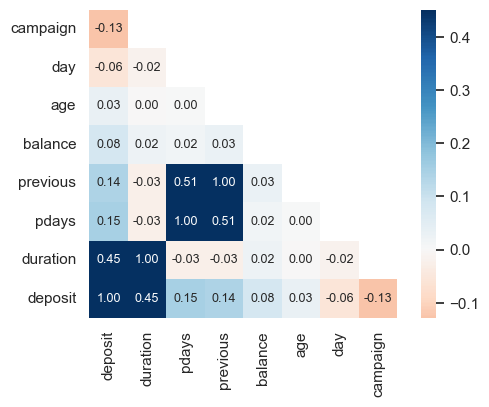

In [109]:
#Heatmap for numberical variebles
#sns.reset_defaults()
corr = df_num.corr().sort_values('deposit', axis=1, ascending=False)
corr = corr.sort_values('deposit', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(6, 4))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.deposit.min(),  
                     vmax=corr.drop(['deposit'],axis=0).deposit.max(),
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 9})

Choose some variables with strong correlation,absolute value >0.1:
    
1. duration
2. pdays ( due to strong relation between pdays and previous, just one variable is in the model)
3. campaign

In [110]:
# get df categorical variebles 
df_cat=df.select_dtypes(include=['object'])
df_cat

job  marital  education default housing loan   contact month  \
0           admin.  married  secondary      no     yes   no   unknown   may   
1           admin.  married  secondary      no      no   no   unknown   may   
2       technician  married  secondary      no     yes   no   unknown   may   
3         services  married  secondary      no     yes   no   unknown   may   
4           admin.  married   tertiary      no      no   no   unknown   may   
...            ...      ...        ...     ...     ...  ...       ...   ...   
11157  blue-collar   single    primary      no     yes   no  cellular   apr   
11158     services  married  secondary      no      no   no   unknown   jun   
11159   technician   single  secondary      no      no   no  cellular   aug   
11160   technician  married  secondary      no      no  yes  cellular   may   
11161   technician  married  secondary      no      no   no  cellular   jul   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
11157  unknown  
11158  unknown  
11159  unknown  
11160  failure  
11161  unknown  

[11162 rows x 9 columns]

In [111]:
# Get dummies for categorical variebles
df_cat_encode = pd.get_dummies(df_cat)
df_cat_encode

job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0            True            False             False          False   
1            True            False             False          False   
2           False            False             False          False   
3           False            False             False          False   
4            True            False             False          False   
...           ...              ...               ...            ...   
11157       False             True             False          False   
11158       False            False             False          False   
11159       False            False             False          False   
11160       False            False             False          False   
11161       False            False             False          False   

       job_management  job_retired  job_self-employed  job_services  \
0               False        False              False         False   
1               False        False              False         False   
2               False        False              False         False   
3               False        False              False          True   
4               False        False              False         False   
...               ...          ...                ...           ...   
11157           False        False              False         False   
11158           False        False              False          True   
11159           False        False              False         False   
11160           False        False              False         False   
11161           False        False              False         False   

       job_student  job_technician  ...  month_jun  month_mar  month_may  \
0            False           False  ...      False      False       True   
1            False           False  ...      False      False       True   
2            False            True  ...      False      False       True   
3            False           False  ...      False      False       True   
4            False           False  ...      False      False       True   
...            ...             ...  ...        ...        ...        ...   
11157        False           False  ...      False      False      False   
11158        False           False  ...       True      False      False   
11159        False            True  ...      False      False      False   
11160        False            True  ...      False      False       True   
11161        False            True  ...      False      False      False   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0          False      False      False             False           False   
1          False      False      False             False           False   
2          False      False      False             False           False   
3          False      False      False             False           False   
4          False      False      False             False           False   
...          ...        ...        ...               ...             ...   
11157      False      False      False             False           False   
11158      False      False      False             False           False   
11159      False      False      False             False           False   
11160      False      False      False              True           False   
11161      False      False      False             False           False   

       poutcome_success  poutcome_unknown  
0                 False              True  
1                 False              True  
2                 False              True  
3                 False              True  
4                 False              True  
...                 ...               ...  
11157             False              True  
11158             False              True  
11159             False              True  
11160             False            

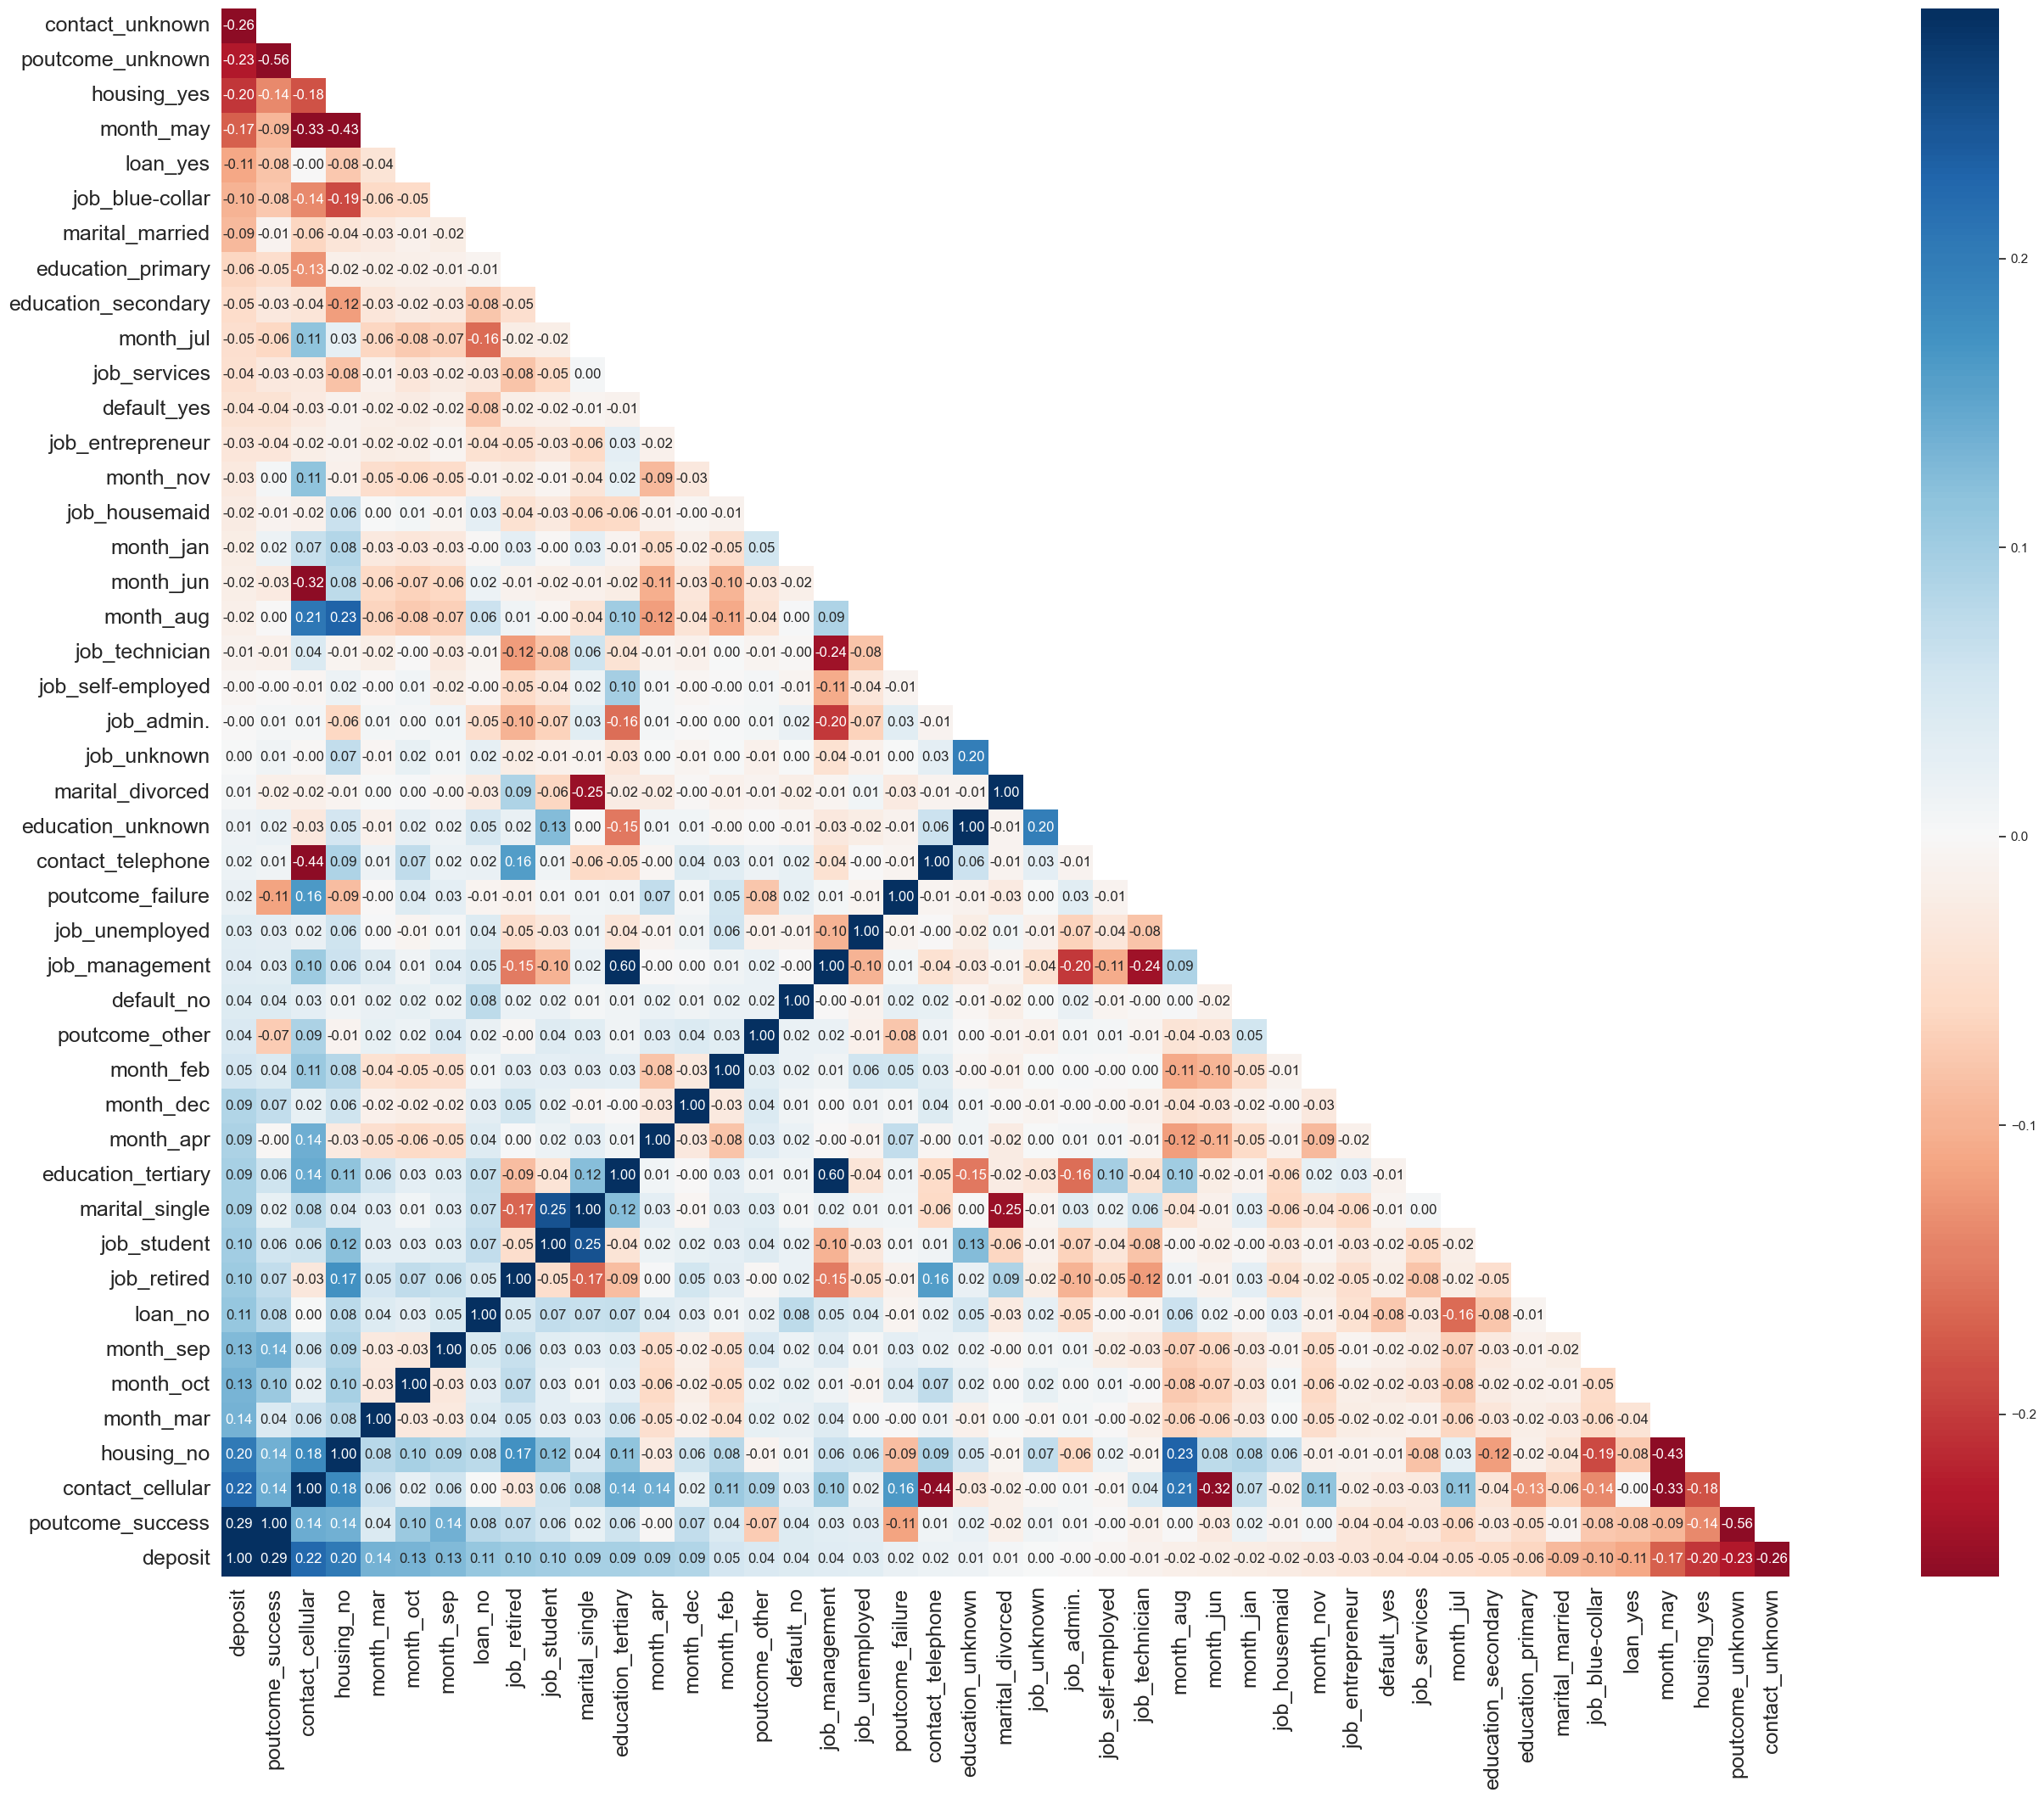

In [112]:
# Heatmap for categorical variebles
cat_corr = pd.concat([df_cat_encode, df_num['deposit']], axis=1)
corr = cat_corr.corr().sort_values('deposit', axis=1, ascending=False)
corr = corr.sort_values('deposit', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(40, 24))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.deposit.min(), 
                     vmax=corr.drop(['deposit'], axis=0).deposit.max(), 
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 12})
    ax.set_xticklabels(ax.get_xticklabels(), size=18)
    ax.set_yticklabels(ax.get_yticklabels(), size=18)


Choose some variables with strong correlation,absolute value >0.1:
    
    
1.  poutcome_success( due to strong relation between poutcome_unknown and poutcome_success, just one variable is in the model)
2.  contact_unknown
3.  contact_cellular
4.  housing_no
5.  housing_yes
6.  month_mar
7.  month_may
8.  month_oct
9.  month_sep
10. loan_yes
11. loan_no
12. job_retired
13. job_student
14. job_blue-collar

In [113]:
# concatenate the numerical and encoded categorical variebles
df_new=pd.concat([df_num,df_cat_encode], axis=1)
df_new

age  balance  day  duration  campaign  pdays  previous  deposit  \
0       59     2343    5      1042         1     -1       0.0        1   
1       56       45    5      1467         1     -1       0.0        1   
2       41     1270    5      1389         1     -1       0.0        1   
3       55     2476    5       579         1     -1       0.0        1   
4       54      184    5       673         2     -1       0.0        1   
...    ...      ...  ...       ...       ...    ...       ...      ...   
11157   33        1   20       257         1     -1       0.0        0   
11158   39      733   16        83         4     -1       0.0        0   
11159   32       29   19       156         2     -1       0.0        0   
11160   43        0    8         9         2    172       5.0        0   
11161   34        0    9       628         1     -1       0.0        0   

       job_admin.  job_blue-collar  ...  month_jun  month_mar  month_may  \
0            True            False  ...      False      False       True   
1            True            False  ...      False      False       True   
2           False            False  ...      False      False       True   
3           False            False  ...      False      False       True   
4            True            False  ...      False      False       True   
...           ...              ...  ...        ...        ...        ...   
11157       False             True  ...      False      False      False   
11158       False            False  ...       True      False      False   
11159       False            False  ...      False      False      False   
11160       False            False  ...      False      False       True   
11161       False            False  ...      False      False      False   

       month_nov  month_oct  month_sep  poutcome_failure  poutcome_other  \
0          False      False      False             False           False   
1          False      False      False             False           False   
2          False      False      False             False           False   
3          False      False      False             False           False   
4          False      False      False             False           False   
...          ...        ...        ...               ...             ...   
11157      False      False      False             False           False   
11158      False      False      False             False           False   
11159      False      False      False             False           False   
11160      False      False      False              True           False   
11161      False      False      False             False           False   

       poutcome_success  poutcome_unknown  
0                 False              True  
1                 False              True  
2                 False              True  
3                 False              True  
4                 False              True  
...                 ...               ...  
11157             False              True  
11158             False              True  
11159             False              True  
11160             False             False  
11161             False              True  

[11162 rows x 52 columns]

In [114]:
from sklearn import model_selection,linear_model, metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [115]:
label = df_new['deposit']         # labels
features = df_new.drop('deposit',axis=1)       # features
x_train,x_test, y_train, y_test = model_selection.train_test_split(features, label,
                                                                   random_state=123, 
                                                                   test_size=.30)
print('The train dataset has {} data\nThe test dataset has {} data'.format(x_train.shape[0],
                                                                           x_test.shape[0]))

The train dataset has 7813 data
The test dataset has 3349 data


In [116]:
df_model_train=pd.concat([x_train,y_train],axis=1)
df_model_test=pd.concat([x_test,y_test],axis=1)
print(df_model_test.isnull().sum())
print(df_model_train.isnull().sum())

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               1
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0


<h3><font color="#007090">Replace missing value

In [117]:
#To calulated person_emp_length median value
impute_value=df_model_train['previous'].median()
impute_value

0.0

In [118]:
df_model_train['previous']=df_model_train['previous'].fillna(impute_value)
df_model_test['previous']=df_model_test['previous'].fillna(impute_value)

In [119]:
#check missing value replace
print(df_model_test.isnull().sum())
print(df_model_train.isnull().sum())

age                    0
balance                0
day                    0
duration               0
campaign               0
pdays                  0
previous               0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
default_no             0
default_yes            0
housing_no             0
housing_yes            0
loan_no                0
loan_yes               0
contact_cellular       0
contact_telephone      0
contact_unknown        0
month_apr              0
month_aug              0
month_dec              0
month_feb              0
month_jan              0


In [120]:
x_train_tmp=df_model_train.drop(columns="deposit")
x_test_tmp=df_model_test.drop(columns="deposit")
x_train_tmp
x_test_tmp

age  balance  day  duration  campaign  pdays  previous  job_admin.  \
293     48      503   12      1243         7     -1       0.0       False   
8185    42      534   16       139         2     -1       0.0        True   
253     35      860    5       884         4     -1       0.0       False   
1350    30     3473   12      1209         2     -1       0.0       False   
9657    44     2885   30        63         3     -1       0.0       False   
...    ...      ...  ...       ...       ...    ...       ...         ...   
10995   53     4576   30        82         2     -1       0.0       False   
6509    35        0   14       125         2     -1       0.0       False   
8145    51      441    7       189         2    167       2.0       False   
1878    25      373   11       819         2     -1       0.0       False   
7535    28     3238   19         7         1     -1       0.0       False   

       job_blue-collar  job_entrepreneur  ...  month_jun  month_mar  \
293              False             False  ...       True      False   
8185             False             False  ...      False      False   
253               True             False  ...       True      False   
1350             False             False  ...      False       True   
9657              True             False  ...      False      False   
...                ...               ...  ...        ...        ...   
10995            False             False  ...      False      False   
6509             False             False  ...      False      False   
8145             False             False  ...      False      False   
1878             False             False  ...      False      False   
7535             False             False  ...      False      False   

       month_may  month_nov  month_oct  month_sep  poutcome_failure  \
293        False      False      False      False             False   
8185        True      False      False      False             False   
253        False      False      False      False             False   
1350       False      False      False      False             False   
9657        True      False      False      False             False   
...          ...        ...        ...        ...               ...   
10995      False      False      False      False             False   
6509       False      False      False      False             False   
8145        True      False      False      False             False   
1878        True      False      False      False             False   
7535        True      False      False      False             False   

       poutcome_other  poutcome_success  poutcome_unknown  
293             False             False              True  
8185            False             False              True  
253             False             False              True  
1350            False             False              True  
9657            False             False              True  
...               ...               ...               ...  
10995           False             False              True  
6509            False             False              True  
8145             True             False             False  
1878            False             False              True  
7535            False             False              True  

[3349 rows x 51 columns]

In [121]:
#According to the heatmap choose variables to model
'''
              'duration','pdays','campaign','poutcome_success',
              'contact_unknown','contact_cellular','housing_no','housing_yes',
              'month_mar','month_may','month_oct','month_sep','loan_yes','loan_no',
              'job_retired','job_student','job_blue-collar'
'''
predictors = ['duration','pdays','campaign','poutcome_success',
              'contact_unknown','contact_cellular','housing_no','housing_yes',
              'month_mar','month_may','month_oct','month_sep','loan_yes','loan_no',
              'job_retired','job_student','job_blue-collar']
x_train = x_train_tmp[predictors].values
x_test = x_test_tmp[predictors].values

In [122]:
def model_plot(model,name):    
    model.fit(x_train, y_train)
    #preds = model.predict(x_test)
    y_predict = model.predict_proba(x_test)
    fpr, tpr, thresh = metrics.roc_curve(y_test, y_predict[:, 1])
    curve = roc_auc_score(y_test, y_predict[:, 1])
    if name=='lg':
        plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(curve,3))}')
    elif name=='knn':
        plt.plot(fpr, tpr, label=f'KNN, AUC = {str(round(curve,3))}')
    elif name=='dt':
        plt.plot(fpr, tpr, label=f'DecisionTree Classifier, AUC = {str(round(curve,3))}')
    elif name == 'xgboost':
        plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(curve, 3))}')    
    elif name=='svm':
        plt.plot(fpr, tpr, label=f'Support Vector Machine, AUC = {str(round(curve, 3))}')
        

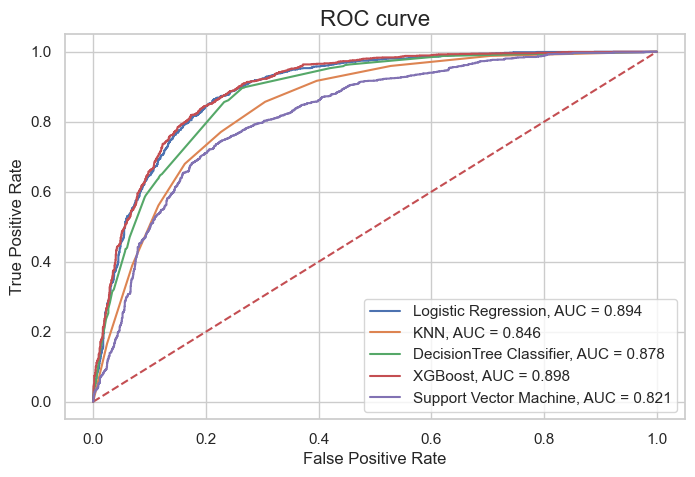

In [123]:
#ROC AUC
fig = plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1],'r--')

model_plot(LogisticRegression(tol=1e-5,max_iter=1000),'lg')
model_plot(KNeighborsClassifier(n_neighbors=9),'knn')
model_plot(DecisionTreeClassifier(max_depth=6, min_samples_split=2, min_samples_leaf=1, random_state=50),'dt')
model_plot(XGBClassifier(), 'xgboost')
  # Use probability=True for decision_function to work
model_plot(SVC(probability=True), 'svm')
                
plt.ylabel("True Positive Rate", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=12)
plt.title("ROC curve",fontsize=16)
plt.rcParams['axes.titlesize'] = 10
plt.legend()
plt.show()


In [124]:
def plot_confusion_matrix(model, x_test, y_test, name):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()
    
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    print(f"Accuracy: {accuracy:.2f}")

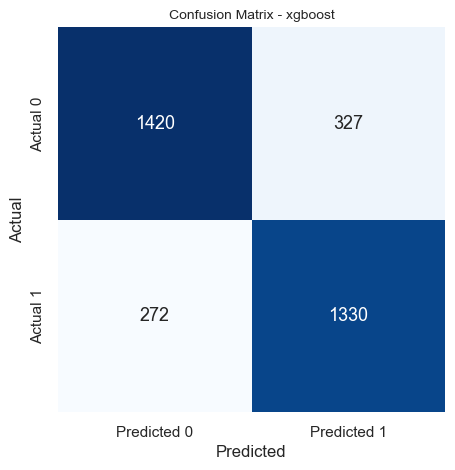

Accuracy: 0.82


In [125]:
plot_confusion_matrix(XGBClassifier(),x_test,y_test,'xgboost')

In [126]:
fit = XGBClassifier().fit(x_train_tmp,y_train).feature_importances_

feature_importance = pd.DataFrame({'feature': x_train_tmp.columns, 'importance': fit})
new_features_df = feature_importance[feature_importance['importance']>0
                                    ].sort_values(by=['importance'],ascending=False)

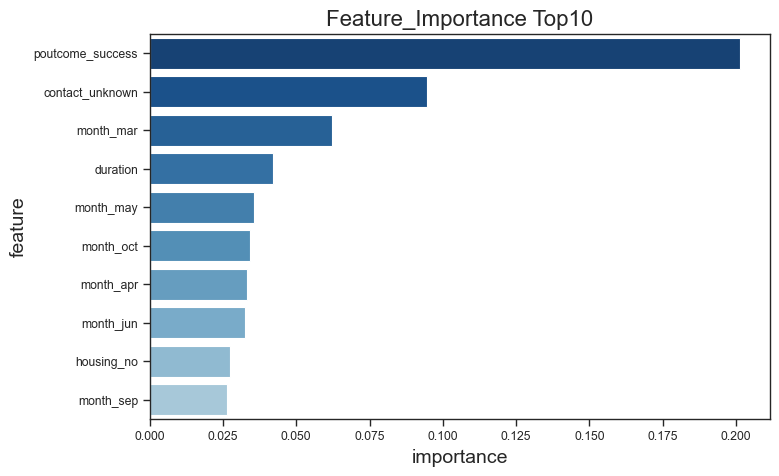

In [127]:
sns.set(context='paper',style='ticks',font='sans-serif',font_scale=1,color_codes=True,rc=None)
figure, ax = plt.subplots(figsize=(8,5))
palette = sns.color_palette("Blues_r", n_colors=15)
ax=sns.barplot(data = new_features_df[:10], 
               y='feature', 
               x='importance',
               palette=palette)
ax.set_title('Feature_Importance Top10', fontsize=16)
ax.set_xlabel('importance', fontsize=14)
ax.set_ylabel('feature', fontsize=14)
plt.show()

<H2 align=center><font size=6 color="#007090">-----END OF THE REPORT-----</H2>

<H1 align=center><font size=16 color="#BB7090">Questions?</H1>